In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-nflx-stock-price-history/netflix_stock_data_yfinance.csv
/kaggle/input/netflix-nflx-stock-price-history/data_dictionary.csv
/kaggle/input/netflix-nflx-stock-price-history/Readme.md


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/netflix-nflx-stock-price-history/netflix_stock_data_yfinance.csv')

# Introduction with emojis (stickers)
print("🎥 Welcome to Netflix Stock Data Analysis! 📈")
print("\n🚀 Introduction:")
print("Dive into the exciting world of stock market analysis with Netflix's historical data. This dataset captures the journey of Netflix (NFLX) stock from its early days as a DVD rental service to a streaming giant. Whether you're a data enthusiast, investor, or just curious, this data offers insights into market trends, volatility, and growth over two decades!")

print("\n🖼️ Problem Framing:")
print("In this analysis, we frame the problem as understanding and predicting stock performance. Key questions include:")
print("- 📊 How has Netflix's stock price evolved over time?")
print("- ⚡ What are the major highs, lows, and splits that influenced its value?")
print("- 🔮 Can we identify patterns for future forecasting using historical Open, High, Low, Close prices and Volume?")
print("We'll explore descriptive statistics, visualizations, and perhaps simple models to frame potential investment strategies or risk assessments.")

print("\n📋 Proper Description of the Dataset:")
print("The dataset is a CSV file containing Netflix's daily stock data sourced from yFinance.")
print(f"- Time Period: From {df['Date'].min()} to {df['Date'].max()}")
print(f"- Number of Records: {len(df)}")
print("- Columns:")
print("  - Date: The trading date (YYYY-MM-DD)")
print("  - Open: Opening price of the stock on that day")
print("  - High: Highest price reached during the day")
print("  - Low: Lowest price reached during the day")
print("  - Close: Closing price of the stock")
print("  - Volume: Number of shares traded")
print("  - Stock Splits: Any stock split ratios (mostly 0, with notable events)")
print("\nSample Data (First 5 Rows):")
print(df.head().to_string(index=False))

print("\n🌟 Ready to analyze? Let's get started! 💡")

🎥 Welcome to Netflix Stock Data Analysis! 📈

🚀 Introduction:
Dive into the exciting world of stock market analysis with Netflix's historical data. This dataset captures the journey of Netflix (NFLX) stock from its early days as a DVD rental service to a streaming giant. Whether you're a data enthusiast, investor, or just curious, this data offers insights into market trends, volatility, and growth over two decades!

🖼️ Problem Framing:
In this analysis, we frame the problem as understanding and predicting stock performance. Key questions include:
- 📊 How has Netflix's stock price evolved over time?
- ⚡ What are the major highs, lows, and splits that influenced its value?
- 🔮 Can we identify patterns for future forecasting using historical Open, High, Low, Close prices and Volume?
We'll explore descriptive statistics, visualizations, and perhaps simple models to frame potential investment strategies or risk assessments.

📋 Proper Description of the Dataset:
The dataset is a CSV file con

In [3]:
import pandas as pd
import numpy as np

# ────────────────────────────────────────────────
#          Netflix Stock Data - Cleaning & Preprocessing
# ────────────────────────────────────────────────

print("═"*65)
print("📊 Netflix Stock Data Cleaning & Preprocessing")
print("═"*65)

# 1. Load the data
# -----------------
df = pd.read_csv('/kaggle/input/netflix-nflx-stock-price-history/netflix_stock_data_yfinance.csv')

print("\nStep 1: Initial dataset shape")
print(f"Rows: {df.shape[0]:,}, Columns: {df.shape[1]}")
print("-"*50)

# 2. Convert Date column to proper datetime
# ------------------------------------------
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check if any date parsing failed
invalid_dates = df['Date'].isna().sum()
if invalid_dates > 0:
    print(f"⚠️ Warning: {invalid_dates} invalid date entries found!")
else:
    print("✓ Date column successfully converted to datetime")

# Set Date as index (very common for time series stock data)
df = df.set_index('Date').sort_index()

print("\nNew index type:", df.index.dtype)
print("-"*50)

# 3. Basic information about the dataset
# --------------------------------------
print("\nStep 2: df.info()")
print("-"*50)
df.info()

# 4. Statistical summary of numerical columns
# -------------------------------------------
print("\nStep 3: Descriptive Statistics (df.describe())")
print("-"*50)
print(df.describe().round(4))

# 5. Check for missing values
# ---------------------------
print("\nStep 4: Missing Values Check")
print("-"*50)
missing = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_report = pd.concat([missing, missing_percent], axis=1)
missing_report.columns = ['Missing Count', 'Missing %']
missing_report['Missing %'] = missing_report['Missing %'].round(3)

print(missing_report)

if df.isnull().sum().sum() == 0:
    print("\n✓ Great! No missing values detected in the dataset.")
else:
    print("\n⚠️ Missing values found — decide on imputation / removal strategy.")

# 6. Check data types again after transformations
# -----------------------------------------------
print("\nStep 5: Final column data types")
print("-"*50)
print(df.dtypes)

# 7. Look for unrealistic / suspicious values
#     (negative prices or volumes are not possible)
# ------------------------------------------------
print("\nStep 6: Sanity / Quality Checks")
print("-"*50)

print("Negative prices?")
print(df[['Open','High','Low','Close']][(df[['Open','High','Low','Close']] < 0).any(axis=1)])

print("\nZero or negative volume?")
print(df[df['Volume'] <= 0][['Volume']])

print("\nStock Splits – non-zero values:")
print(df[df['Stock Splits'] != 0]['Stock Splits'])

# 8. Final message
# ----------------
print("\n" + "═"*65)
print("🧹 Data Cleaning Summary")
print("═"*65)
print("• Date converted to datetime & set as index")
print("• No missing values detected" if df.isnull().sum().sum() == 0 else "• Missing values present – handle before modeling")
print("• All price & volume columns are numeric")
print("• Checked for impossible values (negative prices/volume)")
print("\nReady for EDA, visualization or modeling! 🚀")

═════════════════════════════════════════════════════════════════
📊 Netflix Stock Data Cleaning & Preprocessing
═════════════════════════════════════════════════════════════════

Step 1: Initial dataset shape
Rows: 5,948, Columns: 7
--------------------------------------------------
✓ Date column successfully converted to datetime

New index type: datetime64[ns]
--------------------------------------------------

Step 2: df.info()
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5948 entries, 2002-05-23 to 2026-01-12
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          5948 non-null   float64
 1   High          5948 non-null   float64
 2   Low           5948 non-null   float64
 3   Close         5948 non-null   float64
 4   Volume        5948 non-null   int64  
 5   Stock Splits  5948 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 325

In [4]:
df=pd.read_csv('/kaggle/input/netflix-nflx-stock-price-history/netflix_stock_data_yfinance.csv')
df

Date       Open       High        Low      Close      Volume  \
0     2002-05-23   0.115643   0.124286   0.114571   0.119643  1047900000   
1     2002-05-24   0.121429   0.122500   0.119714   0.121000   111048000   
2     2002-05-28   0.121357   0.123214   0.115714   0.115714    66094000   
3     2002-05-29   0.116429   0.116429   0.108571   0.110357    67578000   
4     2002-05-30   0.110786   0.110786   0.107143   0.107143   101542000   
...          ...        ...        ...        ...        ...         ...   
5943  2026-01-06  91.540001  91.639999  89.739998  90.650002    43331000   
5944  2026-01-07  91.559998  92.419998  90.059998  90.730003    36525700   
5945  2026-01-08  90.449997  91.250000  89.580002  90.529999    40068700   
5946  2026-01-09  90.029999  90.050003  88.320000  89.459999    55579500   
5947  2026-01-12  89.690002  90.339996  89.330002  89.410004    36208000   

      Stock Splits  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
...            ...  
5943           0.0  
5944           0.0  
5945           0.0  
5946           0.0  
5947           0.0  

[5948 rows x 7 columns]

══════════════════════════════════════════════════════════════════════
📊 Important Histograms —  Netflix Stock Data
══════════════════════════════════════════════════════════════════════


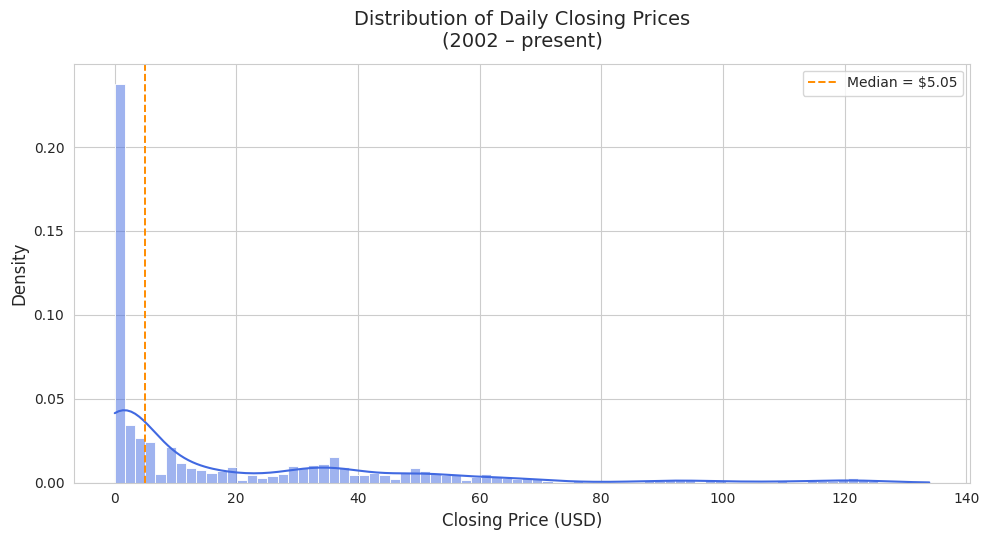

→ Closing price distribution (very right-skewed — typical for growth stocks)
→ Most days had low prices (< $10–20), few very high price days



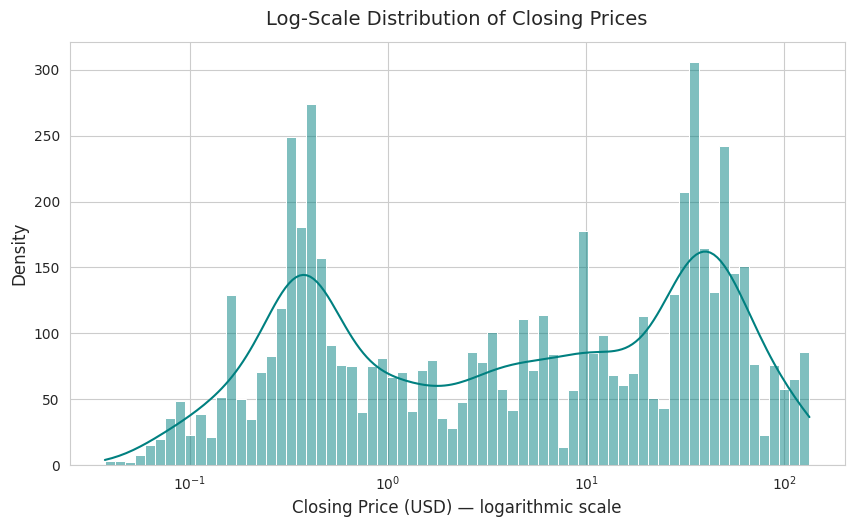

→ Log-transformed closing prices → much closer to normal / multi-modal
→ Reveals different regimes in Netflix history



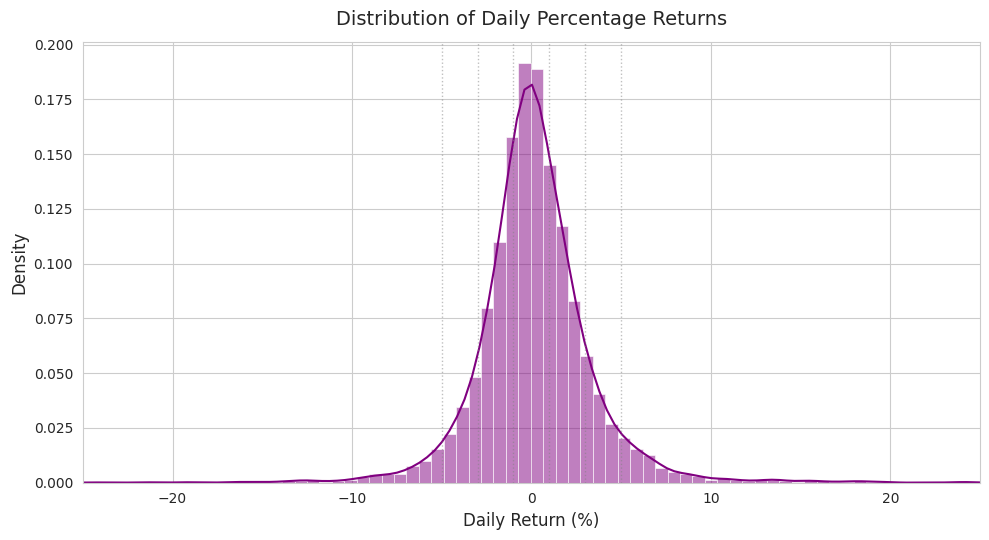

→ Daily returns are roughly symmetric but leptokurtic (fat tails)
→ Many days near 0%, but extreme moves (> ±10%) are clearly visible



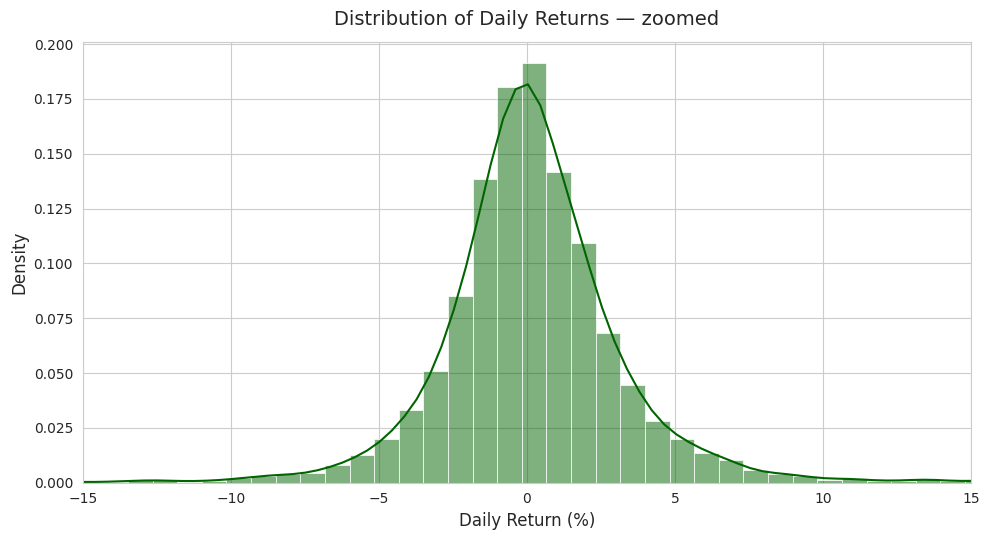

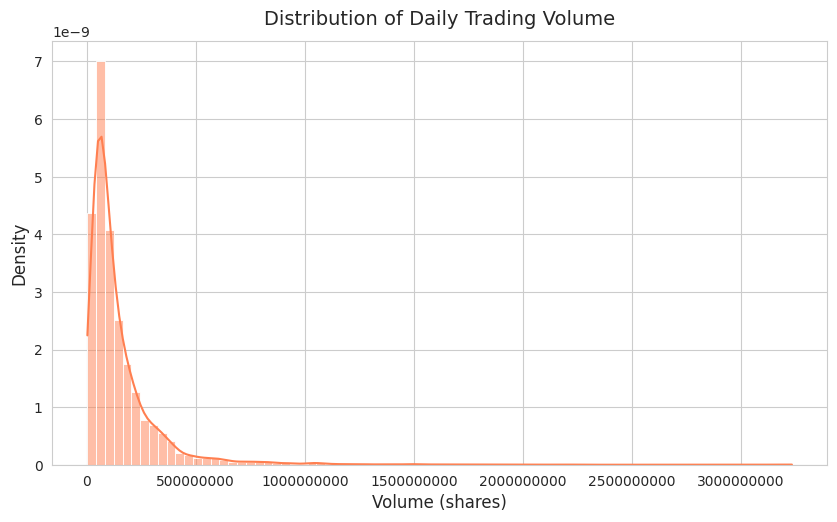

→ Volume is extremely right-skewed
→ Many low-volume days, few extremely high-volume days (news / earnings / splits)



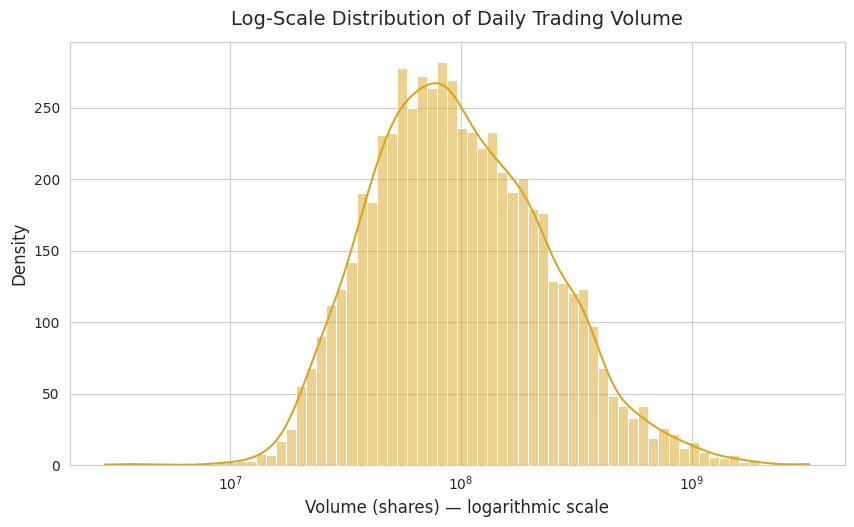

══════════════════════════════════════════════════════════════════════
Key takeaways from distributions:
• Closing prices → strongly right-skewed → use log(price) for modeling
• Daily returns → fat tails (higher kurtosis than normal distribution)
• Volume → extremely skewed → log(volume) often used in features
• Multiple regimes visible especially in log(price) plot
══════════════════════════════════════════════════════════════════════


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ────────────────────────────────────────────────
#        Netflix Stock — Important Distributions
#           Histograms
# ────────────────────────────────────────────────

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (10, 5.5)

# Load data (assuming already cleaned as in previous step)
df = pd.read_csv('/kaggle/input/netflix-nflx-stock-price-history/netflix_stock_data_yfinance.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_index()

print("═"*70)
print("📊 Important Histograms —  Netflix Stock Data")
print("═"*70)

# ─── 1. Closing Price ───────────────────────────────────────────────
plt.figure()
sns.histplot(data=df, x='Close', bins=80, kde=True, color='royalblue', stat='density')
plt.title('Distribution of Daily Closing Prices\n(2002 – present)', fontsize=14, pad=12)
plt.xlabel('Closing Price (USD)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.axvline(df['Close'].median(), color='darkorange', linestyle='--', linewidth=1.4, 
            label=f'Median = ${df["Close"].median():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

print("→ Closing price distribution (very right-skewed — typical for growth stocks)")
print("→ Most days had low prices (< $10–20), few very high price days\n")

# ─── 2. Log(Closing Price) ──────────────────────────────────────────
plt.figure()
sns.histplot(data=df, x=df['Close'], bins=70, kde=True, color='teal', log_scale=(True, False))
plt.title('Log-Scale Distribution of Closing Prices', fontsize=14, pad=12)
plt.xlabel('Closing Price (USD) — logarithmic scale', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

print("→ Log-transformed closing prices → much closer to normal / multi-modal")
print("→ Reveals different regimes in Netflix history\n")

# ─── 3. Daily Returns (%) ───────────────────────────────────────────
df['Return'] = df['Close'].pct_change() * 100

plt.figure()
sns.histplot(data=df, x='Return', bins=120, kde=True, color='purple', stat='density')
plt.title('Distribution of Daily Percentage Returns', fontsize=14, pad=12)
plt.xlabel('Daily Return (%)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add ±1%, ±3%, ±5% reference lines
for pct in [1, 3, 5]:
    plt.axvline( pct, color='gray',  linestyle=':', alpha=0.5, linewidth=1)
    plt.axvline(-pct, color='gray',  linestyle=':', alpha=0.5, linewidth=1)

plt.xlim(-25, 25)   # zoom into realistic daily move range
plt.tight_layout()
plt.show()

print("→ Daily returns are roughly symmetric but leptokurtic (fat tails)")
print("→ Many days near 0%, but extreme moves (> ±10%) are clearly visible\n")

# ─── 4. Log Daily Returns ───────────────────────────────────────────
plt.figure()
sns.histplot(data=df, x='Return', bins=100, kde=True, color='darkgreen', stat='density')
plt.title('Distribution of Daily Returns — zoomed', fontsize=14, pad=12)
plt.xlabel('Daily Return (%)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlim(-15, 15)
plt.tight_layout()
plt.show()

# ─── 5. Trading Volume ──────────────────────────────────────────────
plt.figure()
sns.histplot(data=df, x='Volume', bins=80, kde=True, color='coral', stat='density')
plt.title('Distribution of Daily Trading Volume', fontsize=14, pad=12)
plt.xlabel('Volume (shares)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

print("→ Volume is extremely right-skewed")
print("→ Many low-volume days, few extremely high-volume days (news / earnings / splits)\n")

# ─── 6. Log(Volume) ─────────────────────────────────────────────────
plt.figure()
sns.histplot(data=df, x='Volume', bins=70, kde=True, color='goldenrod', log_scale=(True, False))
plt.title('Log-Scale Distribution of Daily Trading Volume', fontsize=14, pad=12)
plt.xlabel('Volume (shares) — logarithmic scale', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

print("═"*70)
print("Key takeaways from distributions:")
print("• Closing prices → strongly right-skewed → use log(price) for modeling")
print("• Daily returns → fat tails (higher kurtosis than normal distribution)")
print("• Volume → extremely skewed → log(volume) often used in features")
print("• Multiple regimes visible especially in log(price) plot")
print("═"*70)

═══════════════════════════════════════════════════════════════════════════
📊 Key Bar Plots — Netflix Stock Historical Analysis
═══════════════════════════════════════════════════════════════════════════


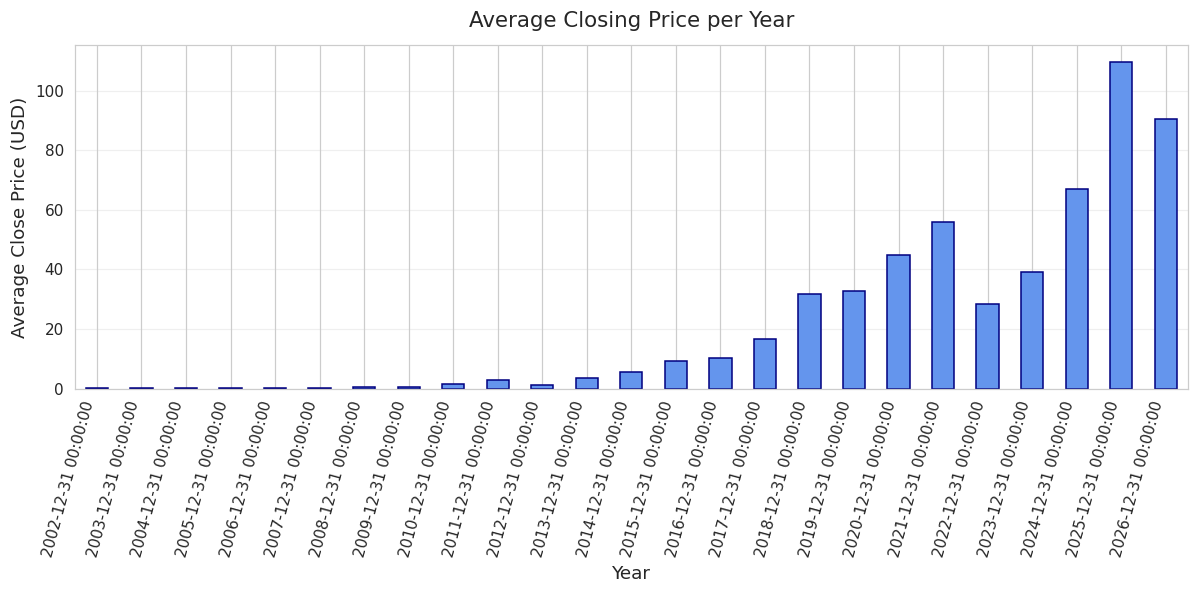

→ Shows long-term growth trajectory of Netflix stock
→ Clear inflection points around 2013–2015 and post-2020



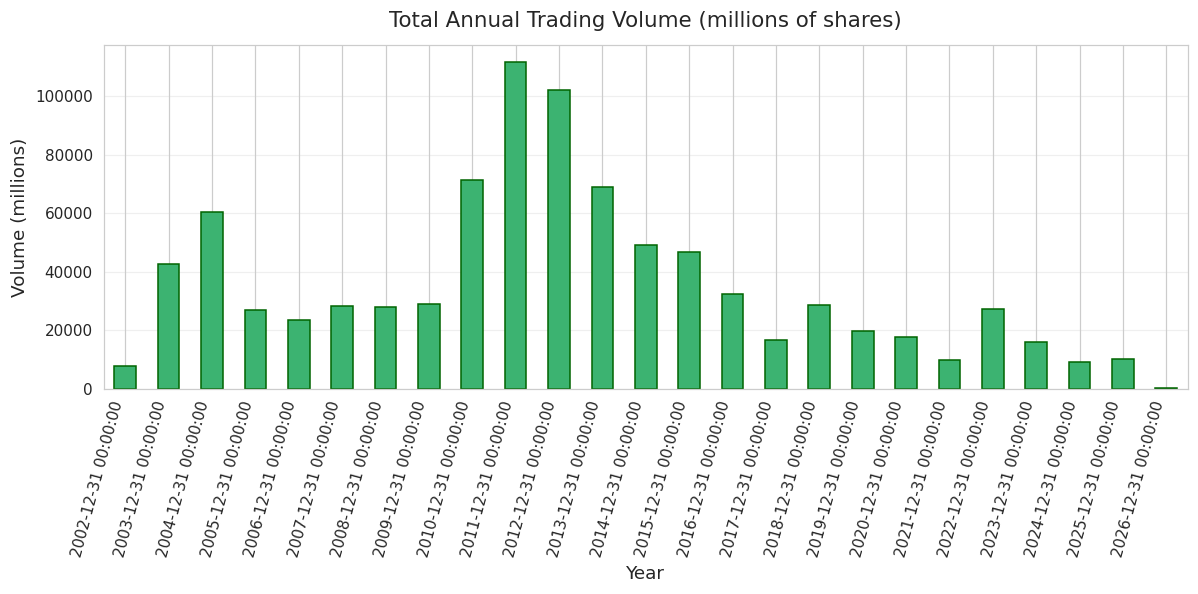

→ Volume spikes often correspond to major news, earnings, or price runs
→ 2020–2022 shows exceptionally high interest during streaming boom



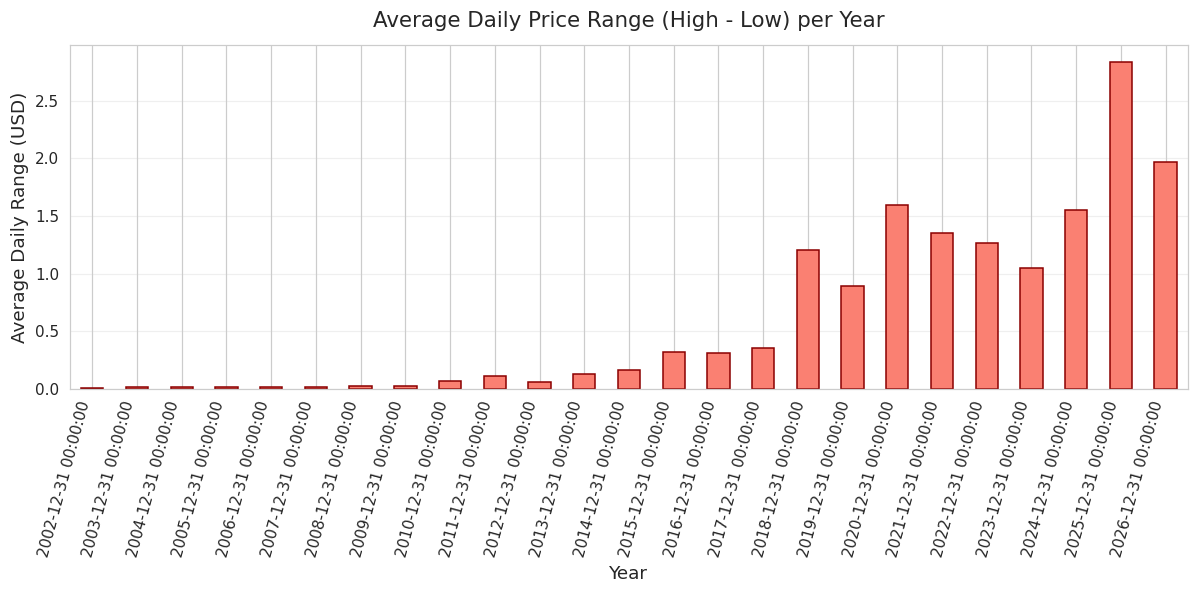

→ Higher bars = more intraday volatility in that year
→ Useful for comparing risk regimes across Netflix history



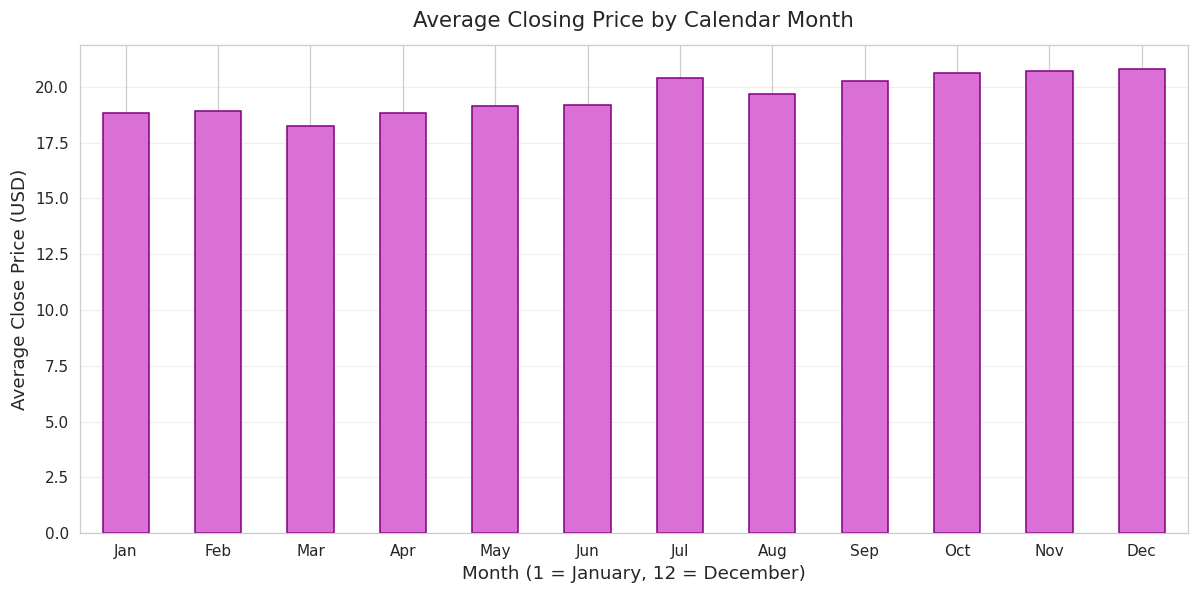

→ Helps detect potential seasonal patterns (weak in most stocks)
→ Netflix shows relatively flat seasonality — growth dominates



<Figure size 1210x605 with 0 Axes>

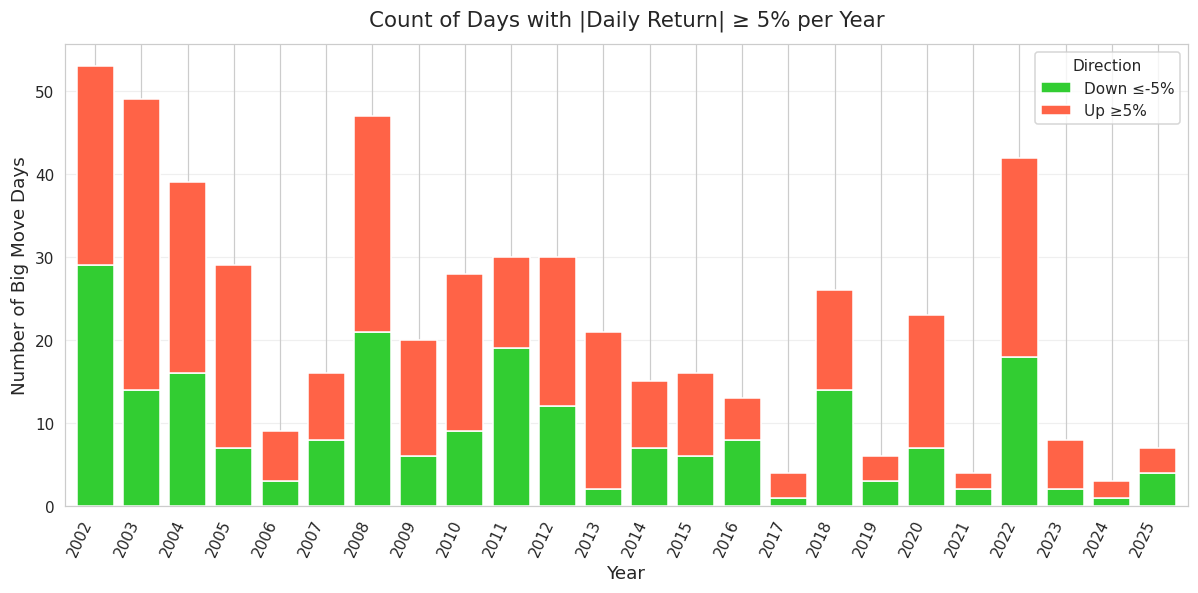

→ Highlights years with extreme price swings
→ Often correlates with earnings surprises, competition news, etc.

═══════════════════════════════════════════════════════════════════════════
Bar Plot Summary – What We Learned:
• Strong upward trend in average price → especially post-2012
• Volume peaked during 2020–2022 growth & uncertainty phase
• Volatility (daily range) increased during major growth periods
• Large daily moves (>5%) are more frequent in certain years
• Calendar month seasonality is weak — trend dominates
═══════════════════════════════════════════════════════════════════════════


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ────────────────────────────────────────────────
#       Netflix Stock — Most Important Bar Plots
# ────────────────────────────────────────────────

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 110
plt.rcParams['figure.figsize'] = (11, 5.5)

# Load & prepare data
df = pd.read_csv('/kaggle/input/netflix-nflx-stock-price-history/netflix_stock_data_yfinance.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_index()

# Add useful columns for aggregation
df['Year']      = df.index.year
df['Month']     = df.index.month
df['YearMonth'] = df.index.to_period('M').astype(str)
df['DailyRange'] = df['High'] - df['Low']
df['Return']    = df['Close'].pct_change() * 100

print("═"*75)
print("📊 Key Bar Plots — Netflix Stock Historical Analysis")
print("═"*75)

# ─── 1. Average Closing Price per Year ───────────────────────────────
yearly_avg = df['Close'].resample('YE').mean()

plt.figure()
yearly_avg.plot(kind='bar', color='cornflowerblue', edgecolor='navy')
plt.title('Average Closing Price per Year', fontsize=14, pad=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Close Price (USD)', fontsize=12)
plt.xticks(rotation=75, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("→ Shows long-term growth trajectory of Netflix stock")
print("→ Clear inflection points around 2013–2015 and post-2020\n")

# ─── 2. Total Trading Volume per Year ────────────────────────────────
yearly_volume = df['Volume'].resample('YE').sum() / 1_000_000  # in millions

plt.figure()
yearly_volume.plot(kind='bar', color='mediumseagreen', edgecolor='darkgreen')
plt.title('Total Annual Trading Volume (millions of shares)', fontsize=14, pad=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Volume (millions)', fontsize=12)
plt.xticks(rotation=75, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("→ Volume spikes often correspond to major news, earnings, or price runs")
print("→ 2020–2022 shows exceptionally high interest during streaming boom\n")

# ─── 3. Average Daily Price Range (Volatility proxy) per Year ────────
yearly_range = df['DailyRange'].resample('YE').mean()

plt.figure()
yearly_range.plot(kind='bar', color='salmon', edgecolor='darkred')
plt.title('Average Daily Price Range (High - Low) per Year', fontsize=14, pad=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Daily Range (USD)', fontsize=12)
plt.xticks(rotation=75, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("→ Higher bars = more intraday volatility in that year")
print("→ Useful for comparing risk regimes across Netflix history\n")

# ─── 4. Average Monthly Closing Price (Seasonality check) ────────────
monthly_avg = df.groupby('Month')['Close'].mean()

plt.figure()
monthly_avg.plot(kind='bar', color='orchid', edgecolor='purple')
plt.title('Average Closing Price by Calendar Month', fontsize=14, pad=12)
plt.xlabel('Month (1 = January, 12 = December)', fontsize=12)
plt.ylabel('Average Close Price (USD)', fontsize=12)
plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("→ Helps detect potential seasonal patterns (weak in most stocks)")
print("→ Netflix shows relatively flat seasonality — growth dominates\n")

# ─── 5. Number of Trading Days with > +5% or < -5% Return per Year ───
big_moves = df[(df['Return'] >= 5) | (df['Return'] <= -5)].copy()
big_moves['Direction'] = np.where(big_moves['Return'] > 0, 'Up ≥5%', 'Down ≤-5%')

yearly_big_moves = big_moves.groupby(['Year', 'Direction']).size().unstack(fill_value=0)

plt.figure()
yearly_big_moves.plot(kind='bar', stacked=True, color=['limegreen', 'tomato'], width=0.8)
plt.title('Count of Days with |Daily Return| ≥ 5% per Year', fontsize=14, pad=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Big Move Days', fontsize=12)
plt.legend(title='Direction')
plt.xticks(rotation=65, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("→ Highlights years with extreme price swings")
print("→ Often correlates with earnings surprises, competition news, etc.\n")

# ─── Summary Message ─────────────────────────────────────────────────
print("═"*75)
print("Bar Plot Summary – What We Learned:")
print("• Strong upward trend in average price → especially post-2012")
print("• Volume peaked during 2020–2022 growth & uncertainty phase")
print("• Volatility (daily range) increased during major growth periods")
print("• Large daily moves (>5%) are more frequent in certain years")
print("• Calendar month seasonality is weak — trend dominates")
print("═"*75)

════════════════════════════════════════════════════════════════════════════════
📦 Key Box Plots — Netflix Stock Historical Analysis
════════════════════════════════════════════════════════════════════════════════


/tmp/ipykernel_55/1425167494.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Year', y='Close', palette='viridis', width=0.65, fliersize=3)


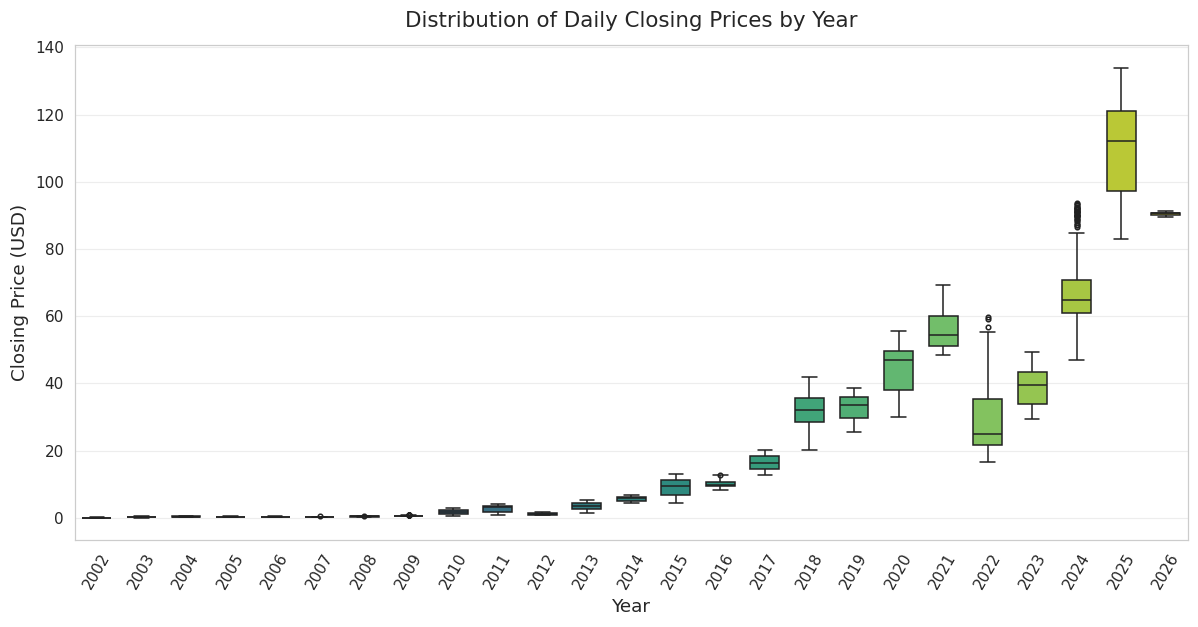

→ Strong upward shift in median price after ~2013
→ Increasing spread (IQR + outliers) as price level rises
→ Early years (2002–2010) have very tight boxes near zero



/tmp/ipykernel_55/1425167494.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Year', y='LogClose', palette='magma', width=0.65, fliersize=3)


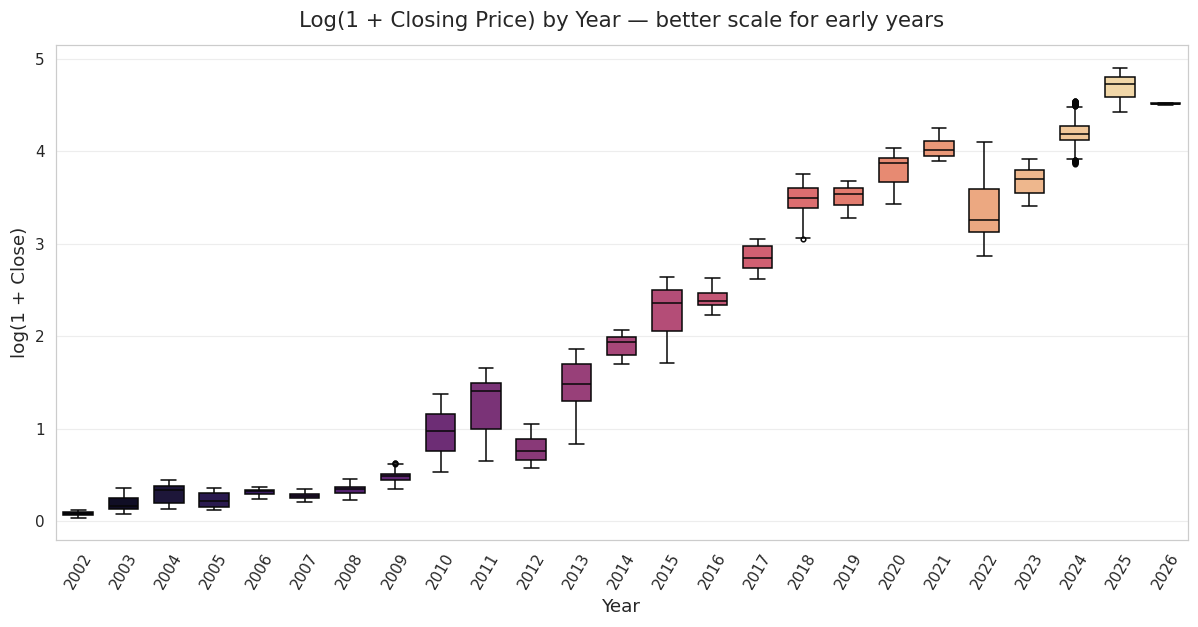

→ Log scale makes early low-price years more comparable
→ Clear acceleration in median level ~2013–2021
→ Reduced right-skewness in visualization



/tmp/ipykernel_55/1425167494.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Year', y='Return', palette='coolwarm', width=0.68, fliersize=3.5)


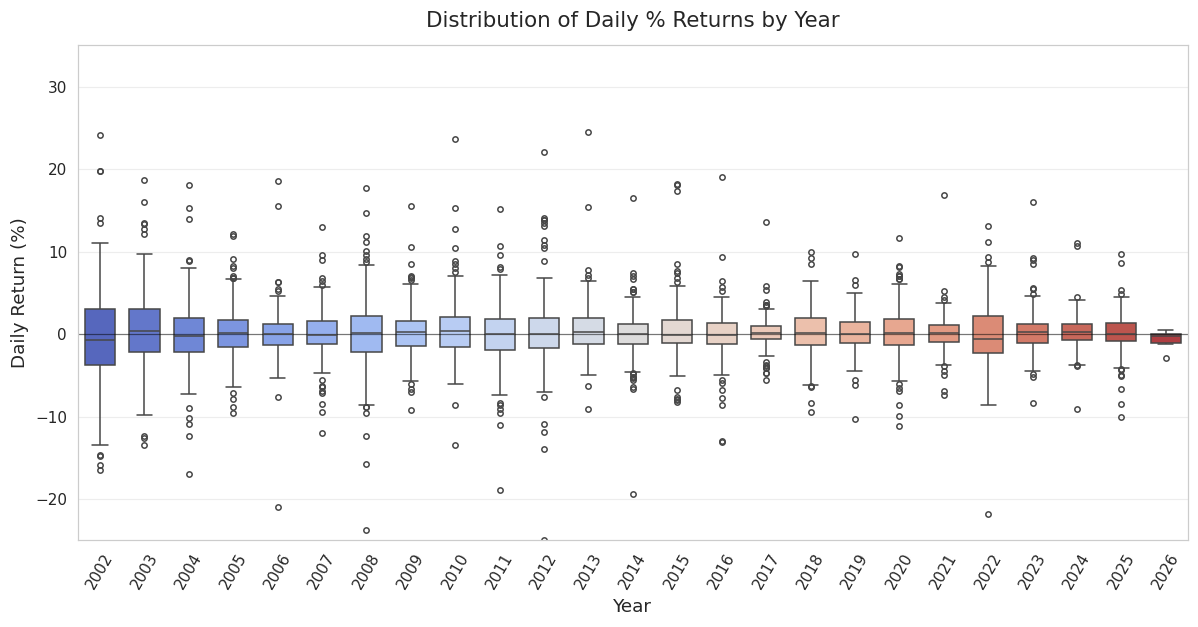

→ Median return close to 0% most years (expected)
→ Fat tails visible — many years have extreme positive & negative outliers
→ Higher volatility (wider boxes / longer whiskers) in certain periods



/tmp/ipykernel_55/1425167494.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Year', y='DailyRange', palette='YlOrBr', width=0.65, fliersize=3)


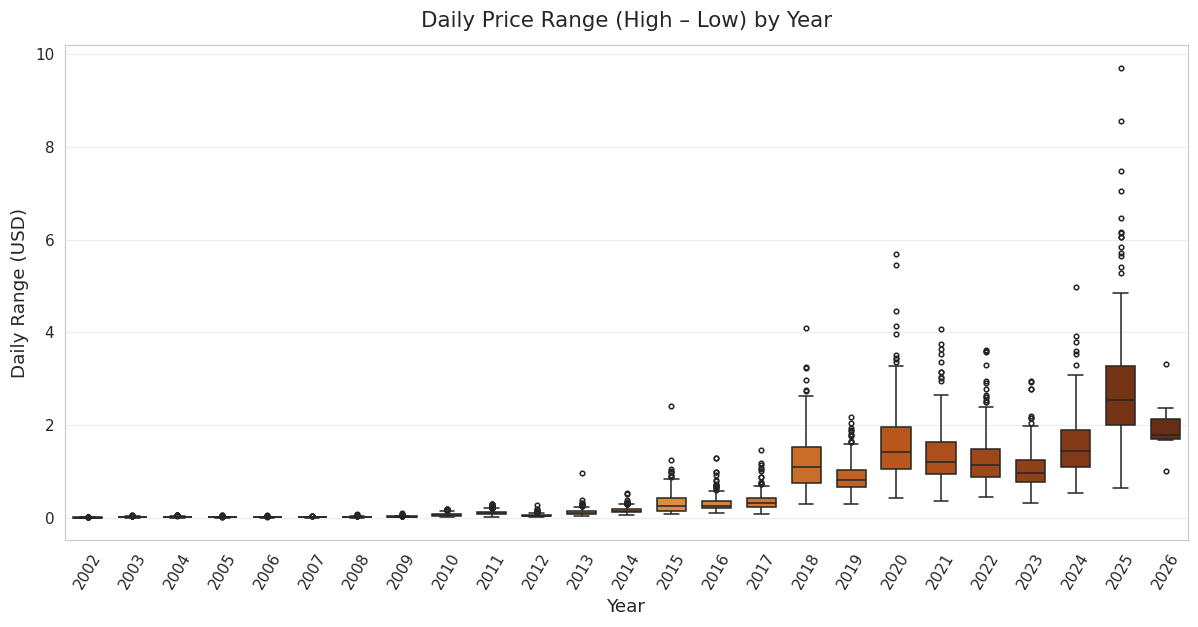

→ Absolute range increases dramatically as share price rises
→ Especially noticeable after 2018–2020 price run-up



/tmp/ipykernel_55/1425167494.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Year', y='RangePct', palette='crest', width=0.65, fliersize=3)


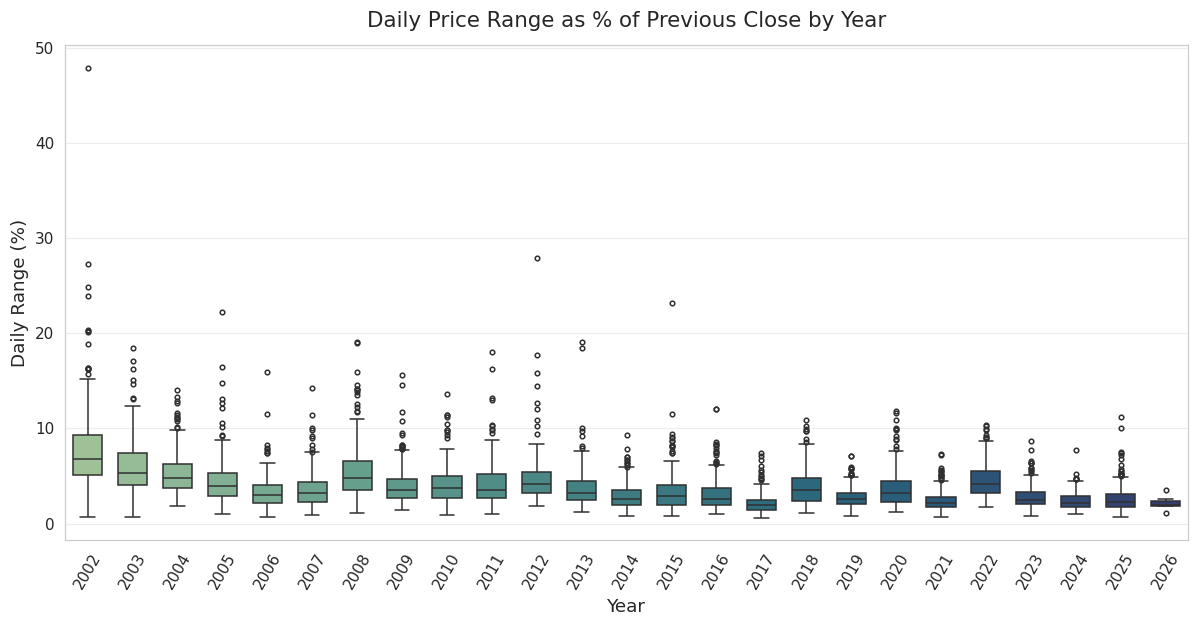

→ % range removes price-level effect → better volatility comparison
→ 2002–2004 and 2022–2025 show relatively higher % ranges
→ Post-split behavior (if any) may appear here


════════════════════════════════════════════════════════════════════════════════
Box Plot Summary – Main Insights:
1. Price level                 → exponential growth, especially 2013–2021
2. Log(price)                  → smoother progression, multiple regimes visible
3. Daily returns               → persistent fat tails across most years
4. Absolute daily range ($)    → grows with price → not great for comparison
5. Relative daily range (%)    → better volatility proxy → spikes in early & recent years
════════════════════════════════════════════════════════════════════════════════


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ────────────────────────────────────────────────
#       Netflix Stock — Most Important Box Plots
# ────────────────────────────────────────────────

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 110
plt.rcParams['figure.figsize'] = (11, 5.8)

# Load & prepare data
df = pd.read_csv('/kaggle/input/netflix-nflx-stock-price-history/netflix_stock_data_yfinance.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_index()

# Helper columns
df['Year']       = df.index.year
df['Return']     = df['Close'].pct_change() * 100
df['LogClose']   = np.log1p(df['Close'])           # log(1 + Close) to handle very small early prices
df['DailyRange'] = df['High'] - df['Low']
df['RangePct']   = (df['High'] - df['Low']) / df['Close'].shift(1) * 100

print("═"*80)
print("📦 Key Box Plots — Netflix Stock Historical Analysis")
print("═"*80)

# ─── 1. Closing Price by Year (shows growth + spread) ────────────────
plt.figure()
sns.boxplot(data=df, x='Year', y='Close', palette='viridis', width=0.65, fliersize=3)
plt.title('Distribution of Daily Closing Prices by Year', fontsize=14, pad=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.xticks(rotation=60)
plt.grid(axis='y', alpha=0.35)
plt.tight_layout()
plt.show()

print("→ Strong upward shift in median price after ~2013")
print("→ Increasing spread (IQR + outliers) as price level rises")
print("→ Early years (2002–2010) have very tight boxes near zero\n")

# ─── 2. Log(Closing Price) by Year ───────────────────────────────────
plt.figure()
sns.boxplot(data=df, x='Year', y='LogClose', palette='magma', width=0.65, fliersize=3)
plt.title('Log(1 + Closing Price) by Year — better scale for early years', fontsize=14, pad=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('log(1 + Close)', fontsize=12)
plt.xticks(rotation=60)
plt.grid(axis='y', alpha=0.35)
plt.tight_layout()
plt.show()

print("→ Log scale makes early low-price years more comparable")
print("→ Clear acceleration in median level ~2013–2021")
print("→ Reduced right-skewness in visualization\n")

# ─── 3. Daily Returns (%) by Year ────────────────────────────────────
plt.figure()
sns.boxplot(data=df, x='Year', y='Return', palette='coolwarm', width=0.68, fliersize=3.5)
plt.title('Distribution of Daily % Returns by Year', fontsize=14, pad=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Daily Return (%)', fontsize=12)
plt.axhline(0, color='black', linewidth=0.8, alpha=0.5)
plt.ylim(-25, 35)  # zoom to readable range (extreme outliers exist)
plt.xticks(rotation=60)
plt.grid(axis='y', alpha=0.35)
plt.tight_layout()
plt.show()

print("→ Median return close to 0% most years (expected)")
print("→ Fat tails visible — many years have extreme positive & negative outliers")
print("→ Higher volatility (wider boxes / longer whiskers) in certain periods\n")

# ─── 4. Intraday Range ($) by Year ───────────────────────────────────
plt.figure()
sns.boxplot(data=df, x='Year', y='DailyRange', palette='YlOrBr', width=0.65, fliersize=3)
plt.title('Daily Price Range (High – Low) by Year', fontsize=14, pad=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Daily Range (USD)', fontsize=12)
plt.xticks(rotation=60)
plt.grid(axis='y', alpha=0.35)
plt.tight_layout()
plt.show()

print("→ Absolute range increases dramatically as share price rises")
print("→ Especially noticeable after 2018–2020 price run-up\n")

# ─── 5. Intraday Range (%) by Year — normalized volatility ───────────
plt.figure()
sns.boxplot(data=df, x='Year', y='RangePct', palette='crest', width=0.65, fliersize=3)
plt.title('Daily Price Range as % of Previous Close by Year', fontsize=14, pad=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Daily Range (%)', fontsize=12)
plt.xticks(rotation=60)
plt.grid(axis='y', alpha=0.35)
plt.tight_layout()
plt.show()

print("→ % range removes price-level effect → better volatility comparison")
print("→ 2002–2004 and 2022–2025 show relatively higher % ranges")
print("→ Post-split behavior (if any) may appear here\n")

# ─── Summary ─────────────────────────────────────────────────────────
print("\n" + "═"*80)
print("Box Plot Summary – Main Insights:")
print("1. Price level                 → exponential growth, especially 2013–2021")
print("2. Log(price)                  → smoother progression, multiple regimes visible")
print("3. Daily returns               → persistent fat tails across most years")
print("4. Absolute daily range ($)    → grows with price → not great for comparison")
print("5. Relative daily range (%)    → better volatility proxy → spikes in early & recent years")
print("═"*80)

═════════════════════════════════════════════════════════════════════════════════════
🎻 Key Violin Plots — Netflix Stock Historical Distribution Analysis
═════════════════════════════════════════════════════════════════════════════════════


/tmp/ipykernel_55/2869350176.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


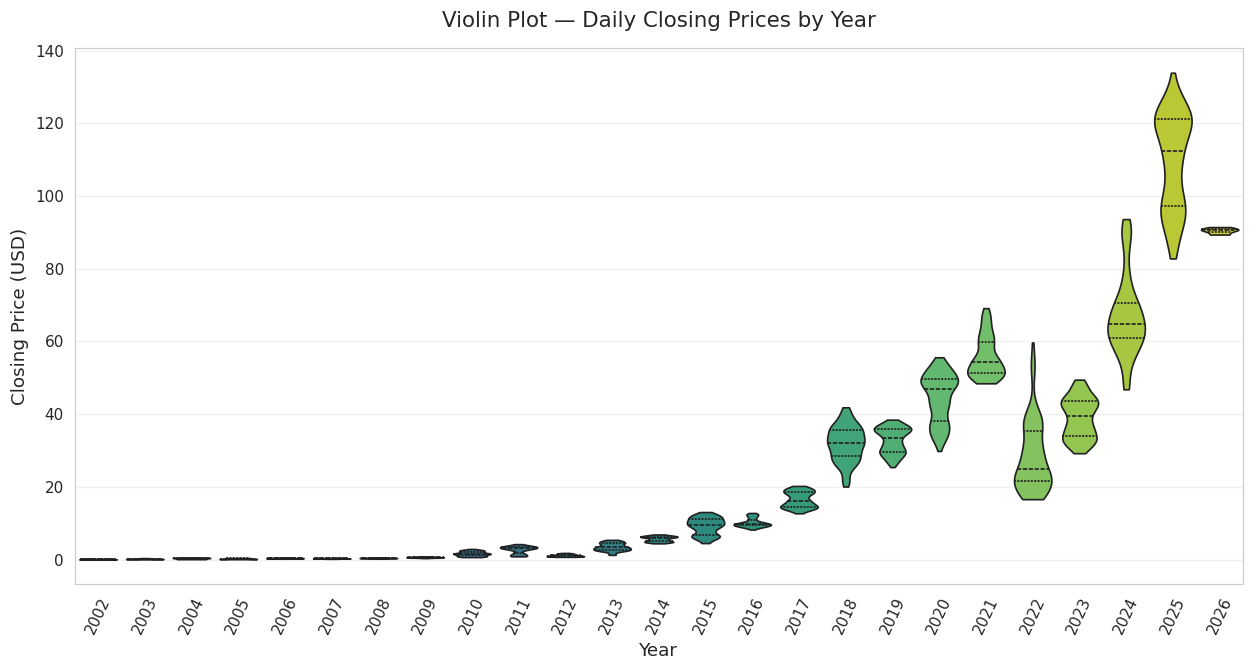

Violin 1: Closing Price by Year
→ Shows both density shape + summary statistics (median + quartiles)
→ Very clear regime change: tight low prices → 2013–2021 explosive widening & upward shift
→ Recent years show wider violins = higher absolute volatility



/tmp/ipykernel_55/2869350176.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


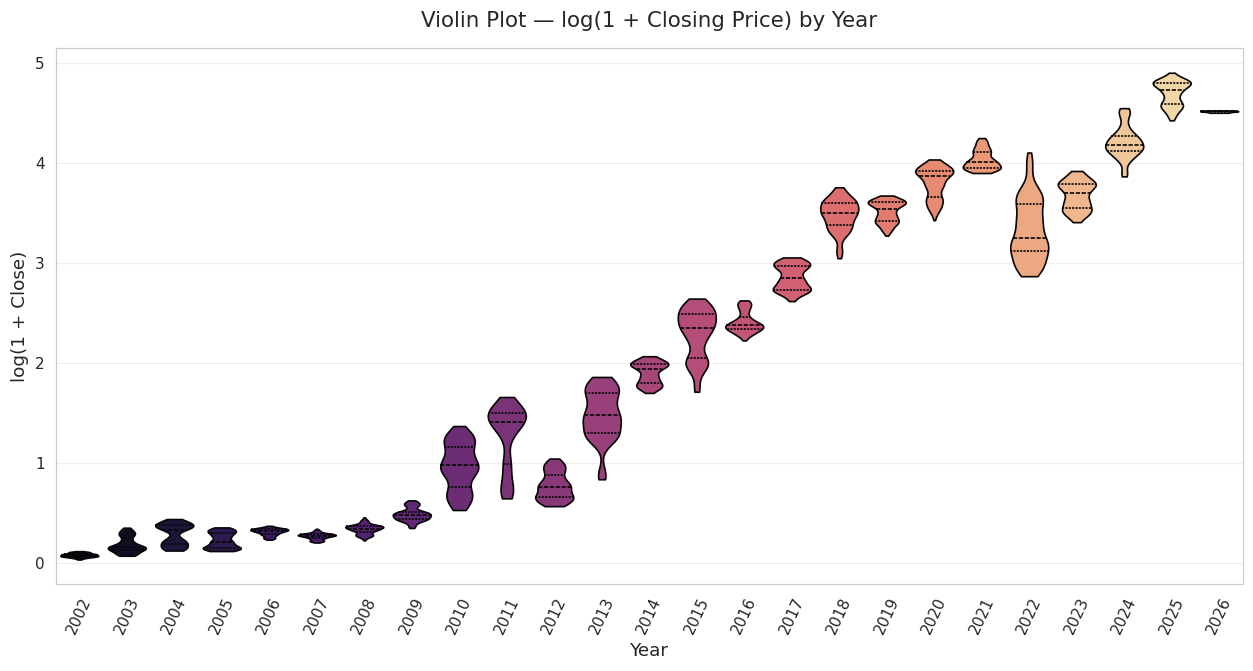

Violin 2: Log-scale Closing Price by Year
→ Much more readable for early low-price years
→ Reveals smoother progression + multiple semi-stable growth phases
→ Median line shows acceleration periods very clearly



/tmp/ipykernel_55/2869350176.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


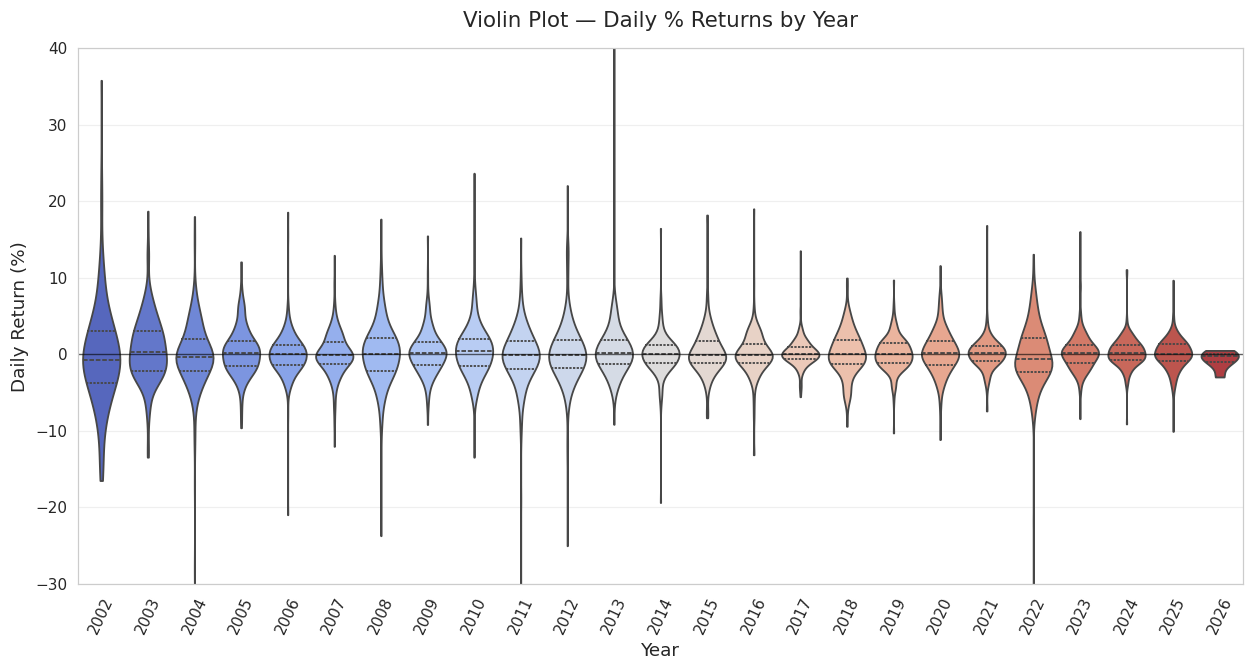

Violin 3: Daily Returns Distribution by Year
→ Symmetric around zero most years
→ Fat tails visible as long whiskers / wide outer shape
→ Some years show noticeably wider violins → higher realized volatility



/tmp/ipykernel_55/2869350176.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


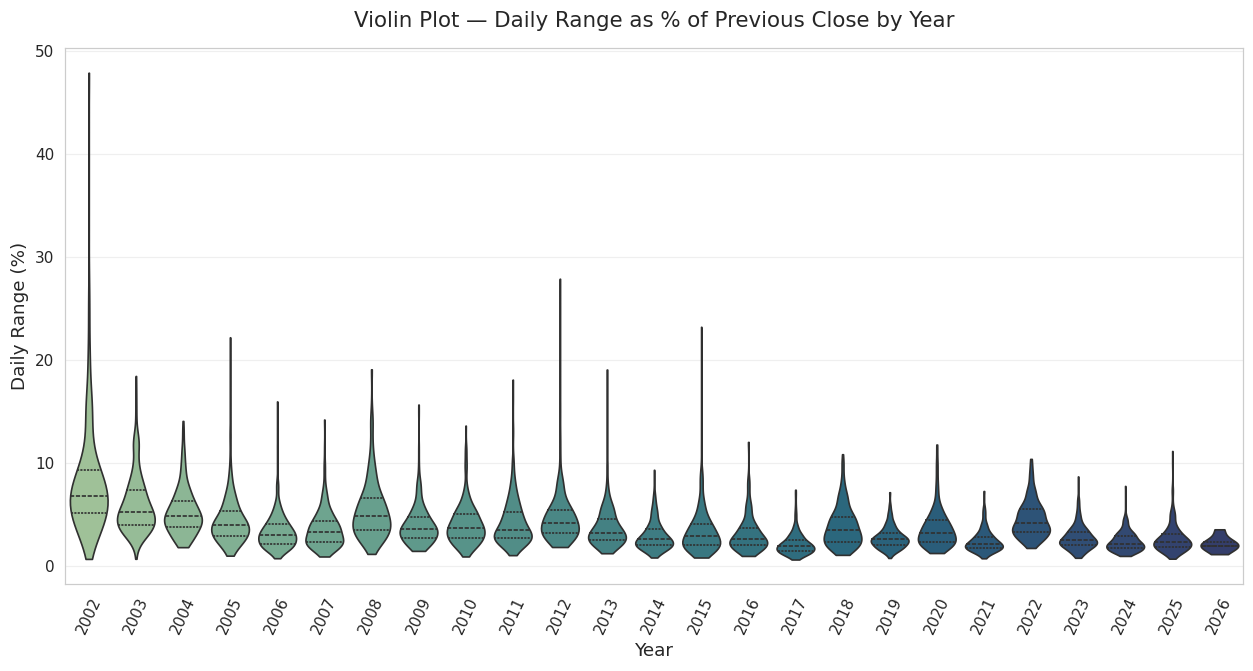

Violin 4: Relative Daily Range (High-Low) % by Year
→ Removes price level bias → better volatility comparison across time
→ Early years (2002–2006) and several recent years show fatter distributions
→ Good proxy for average daily “excitement” / uncertainty



/tmp/ipykernel_55/2869350176.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


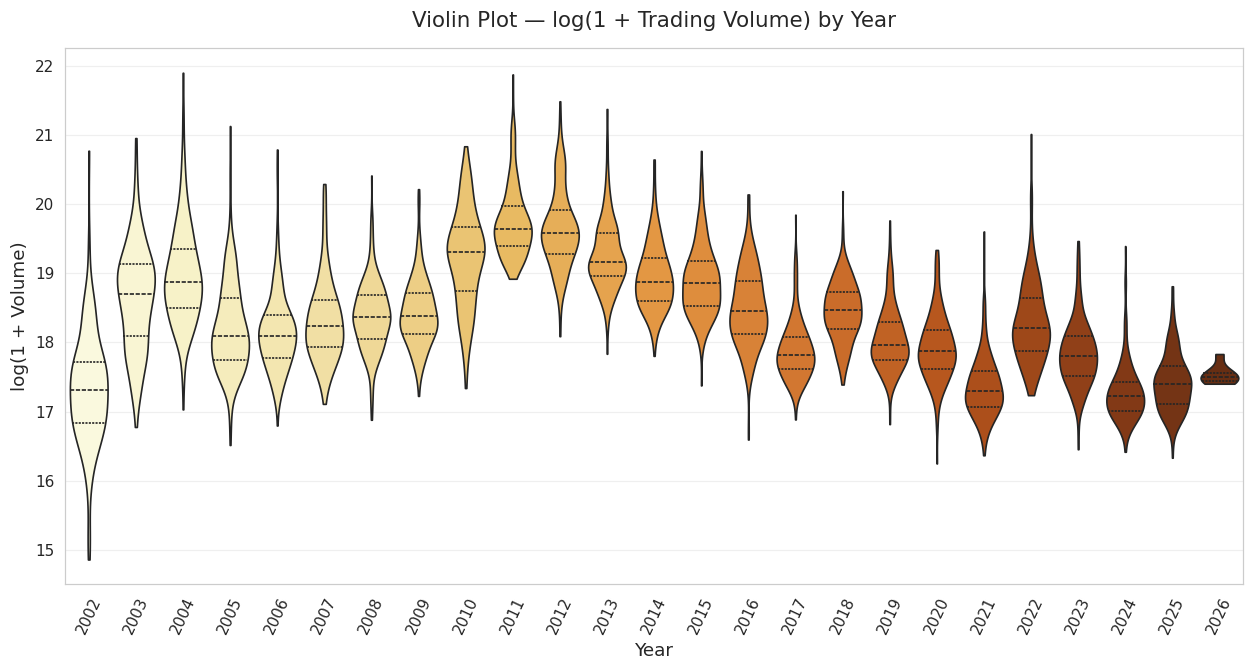

Violin 5: Log Trading Volume by Year
→ Volume distribution per year after log transformation
→ Clear peaks in investor attention (2020–2022, some 2025 spikes)
→ Early years had very low typical volume → tight lower violins


═════════════════════════════════════════════════════════════════════════════════════
Violin Plot Summary – Core Messages:
• Price level (raw & log)   → dramatic regime shifts around 2013 and post-2020
• Daily returns             → persistent leptokurtosis (fat tails) across most years
• Relative daily range (%)  → best year-to-year volatility comparison
• Log volume                → shows periods of unusually high market interest
═════════════════════════════════════════════════════════════════════════════════════


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ────────────────────────────────────────────────
#       Netflix Stock — Most Important Violin Plots
# ────────────────────────────────────────────────

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 110
plt.rcParams['figure.figsize'] = (11.5, 6.2)

# Load & prepare data
df = pd.read_csv('/kaggle/input/netflix-nflx-stock-price-history/netflix_stock_data_yfinance.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_index()

# Helper columns
df['Year']         = df.index.year.astype(str)   # treat as category for better violin separation
df['Return']       = df['Close'].pct_change() * 100
df['LogClose']     = np.log1p(df['Close'])
df['DailyRangePct']= ((df['High'] - df['Low']) / df['Close'].shift(1)) * 100
df['VolumeLog']    = np.log1p(df['Volume'])

print("═"*85)
print("🎻 Key Violin Plots — Netflix Stock Historical Distribution Analysis")
print("═"*85)

# ─── 1. Closing Price distribution by Year (violin) ──────────────────
plt.figure()
sns.violinplot(
    data=df,
    x='Year',
    y='Close',
    palette='viridis',
    inner='quartile',
    linewidth=1.1,
    cut=0
)
plt.title('Violin Plot — Daily Closing Prices by Year', fontsize=14, pad=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.xticks(rotation=65)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Violin 1: Closing Price by Year")
print("→ Shows both density shape + summary statistics (median + quartiles)")
print("→ Very clear regime change: tight low prices → 2013–2021 explosive widening & upward shift")
print("→ Recent years show wider violins = higher absolute volatility\n")

# ─── 2. Log(Close) by Year ───────────────────────────────────────────
plt.figure()
sns.violinplot(
    data=df,
    x='Year',
    y='LogClose',
    palette='magma',
    inner='quartile',
    linewidth=1.1,
    cut=0
)
plt.title('Violin Plot — log(1 + Closing Price) by Year', fontsize=14, pad=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('log(1 + Close)', fontsize=12)
plt.xticks(rotation=65)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Violin 2: Log-scale Closing Price by Year")
print("→ Much more readable for early low-price years")
print("→ Reveals smoother progression + multiple semi-stable growth phases")
print("→ Median line shows acceleration periods very clearly\n")

# ─── 3. Daily Returns (%) by Year ────────────────────────────────────
plt.figure()
sns.violinplot(
    data=df,
    x='Year',
    y='Return',
    palette='coolwarm',
    inner='quartile',
    linewidth=1.2,
    cut=0
)
plt.axhline(0, color='black', linewidth=0.9, alpha=0.6)
plt.title('Violin Plot — Daily % Returns by Year', fontsize=14, pad=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Daily Return (%)', fontsize=12)
plt.ylim(-30, 40)          # focus on realistic central range
plt.xticks(rotation=65)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Violin 3: Daily Returns Distribution by Year")
print("→ Symmetric around zero most years")
print("→ Fat tails visible as long whiskers / wide outer shape")
print("→ Some years show noticeably wider violins → higher realized volatility\n")

# ─── 4. Intraday Range (%) by Year ───────────────────────────────────
plt.figure()
sns.violinplot(
    data=df,
    x='Year',
    y='DailyRangePct',
    palette='crest',
    inner='quartile',
    linewidth=1.1,
    cut=0
)
plt.title('Violin Plot — Daily Range as % of Previous Close by Year', fontsize=14, pad=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Daily Range (%)', fontsize=12)
plt.xticks(rotation=65)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Violin 4: Relative Daily Range (High-Low) % by Year")
print("→ Removes price level bias → better volatility comparison across time")
print("→ Early years (2002–2006) and several recent years show fatter distributions")
print("→ Good proxy for average daily “excitement” / uncertainty\n")

# ─── 5. Log(Volume) by Year ──────────────────────────────────────────
plt.figure()
sns.violinplot(
    data=df,
    x='Year',
    y='VolumeLog',
    palette='YlOrBr',
    inner='quartile',
    linewidth=1.1,
    cut=0
)
plt.title('Violin Plot — log(1 + Trading Volume) by Year', fontsize=14, pad=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('log(1 + Volume)', fontsize=12)
plt.xticks(rotation=65)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Violin 5: Log Trading Volume by Year")
print("→ Volume distribution per year after log transformation")
print("→ Clear peaks in investor attention (2020–2022, some 2025 spikes)")
print("→ Early years had very low typical volume → tight lower violins\n")

# ─── Summary ─────────────────────────────────────────────────────────
print("\n" + "═"*85)
print("Violin Plot Summary – Core Messages:")
print("• Price level (raw & log)   → dramatic regime shifts around 2013 and post-2020")
print("• Daily returns             → persistent leptokurtosis (fat tails) across most years")
print("• Relative daily range (%)  → best year-to-year volatility comparison")
print("• Log volume                → shows periods of unusually high market interest")
print("═"*85)

══════════════════════════════════════════════════════════════════════════════════════════
📊 Important Pairplots & Scatterplots — Netflix Stock Relationships
══════════════════════════════════════════════════════════════════════════════════════════

Pairplot 1: Core variables (Close, Volume, Return, Range %)


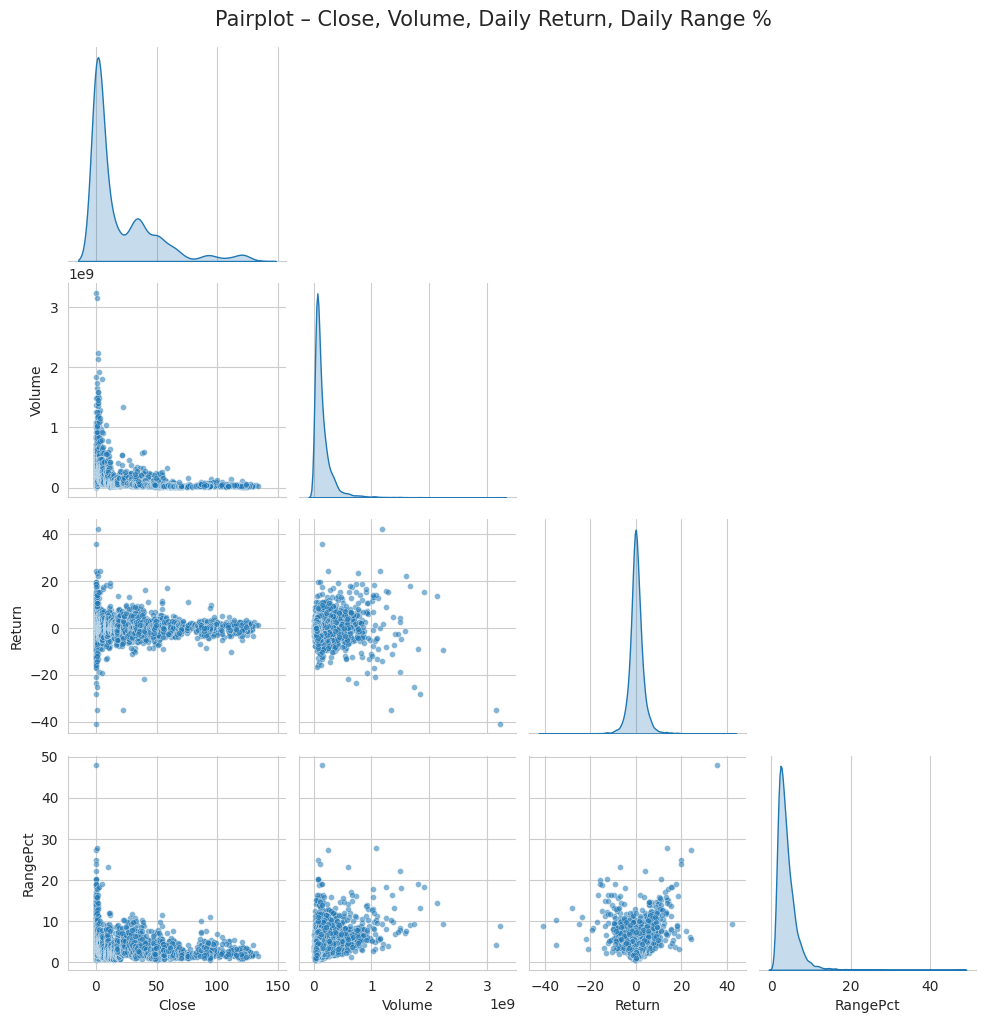


Interpretation:
• Close vs Volume        → weak positive relationship (higher prices → somewhat higher volume)
• Return vs RangePct     → strong positive correlation (big move days = large intraday ranges)
• Return distribution    → fat tails visible on marginal plots
• Volume very right-skewed → log transformation usually recommended


Pairplot 2: Log-transformed versions (better linearity & scale)


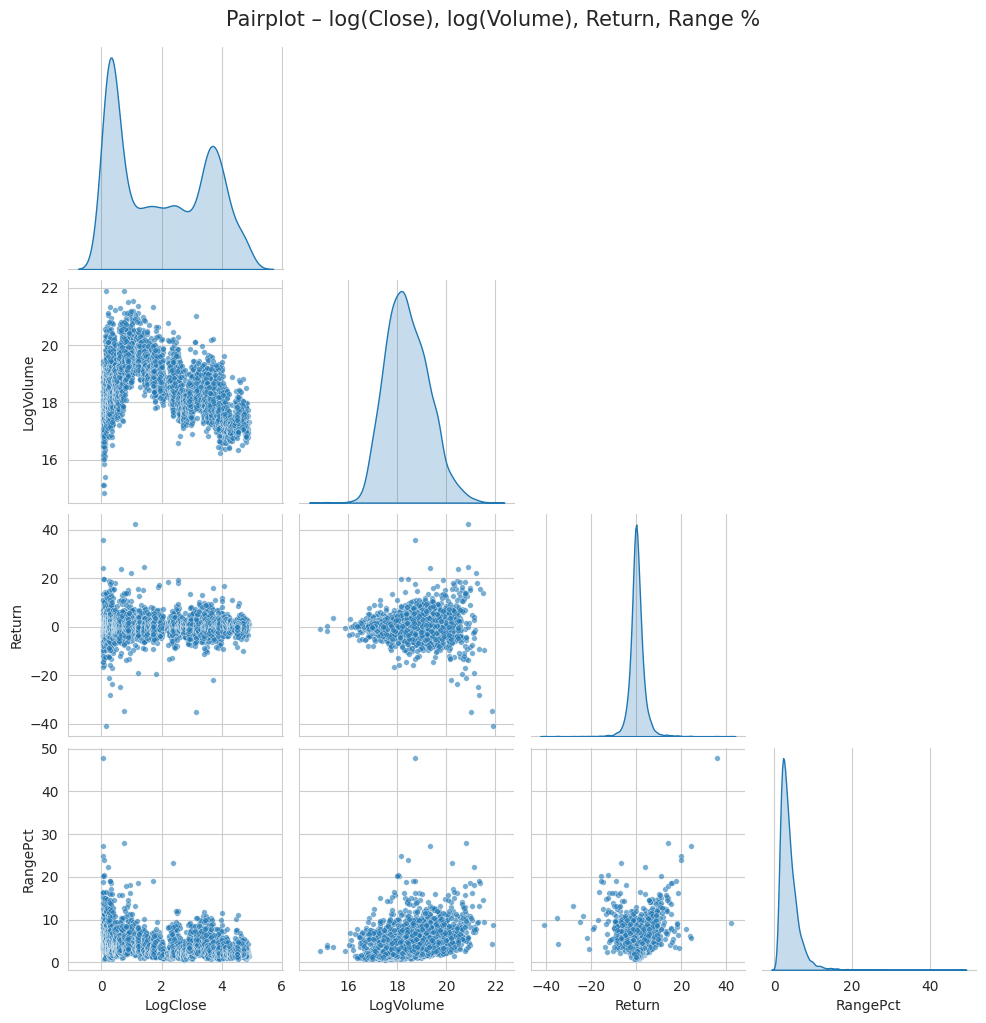


Interpretation – log version:
• log(Close) vs log(Volume)  → clearer positive trend (larger companies / higher prices attract more volume)
• log(Close) vs Return       → almost no linear relationship (returns are stationary)
• Return vs RangePct         → still strong positive → big % moves go together with big intraday %



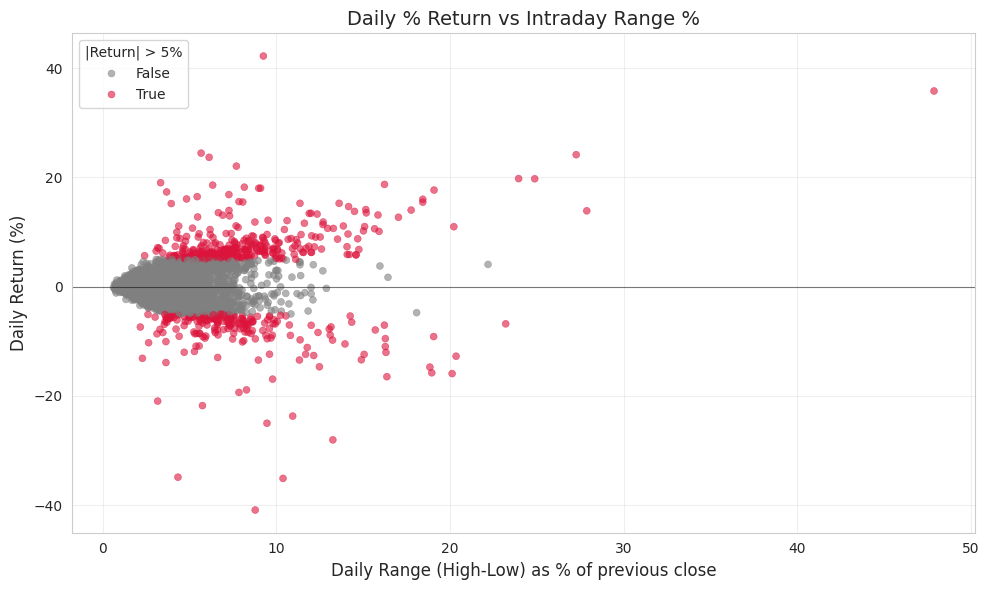


Scatter 3.1:
Strong linear relationship between intraday range and size of daily return.
Large moves almost always come with large intraday ranges — very intuitive.



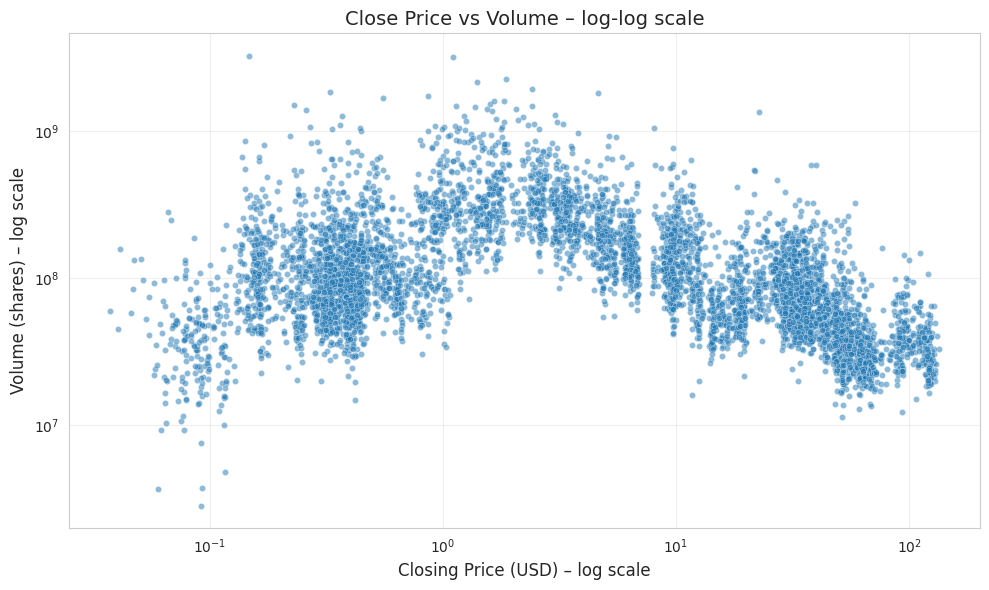


Scatter 3.2:
Log-log view reveals a roughly positive power-law-like relationship:
higher priced periods tend to have higher trading volume (more interest / liquidity).



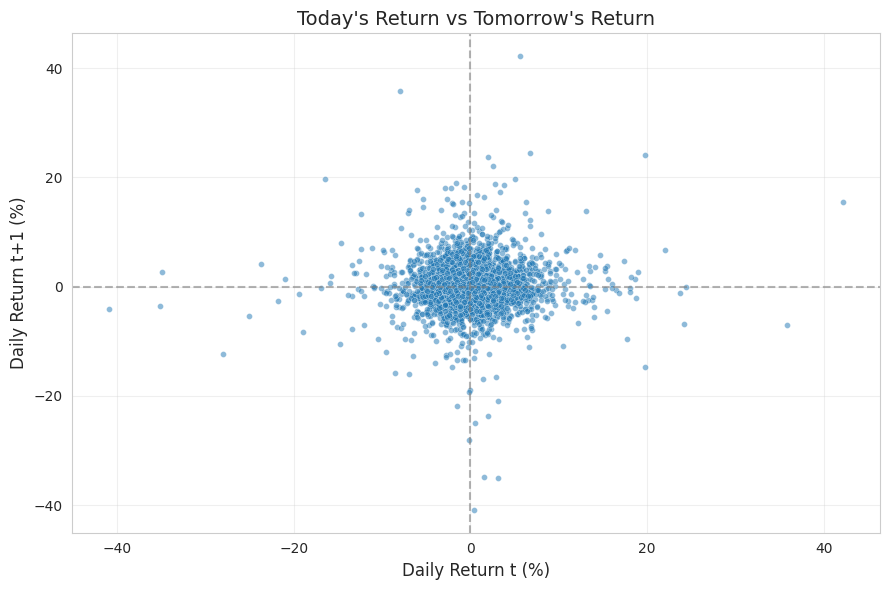


Scatter 3.3:
Almost no visible autocorrelation in daily returns → close to random walk behavior
(typical for efficient/liquid stocks like Netflix in most periods)
Very weak mean-reversion or momentum visible at daily horizon.


══════════════════════════════════════════════════════════════════════════════════════════
Most important relationships seen in scatter & pair plots:
  1. Daily return  ↔  Intraday range %      → strong positive (big moves = big ranges)
  2. log(Close)    ↔  log(Volume)          → moderate positive (higher prices → more volume)
  3. Return today  ↔  Return tomorrow       → almost no relationship (weak autocorrelation)
  4. Volume        → very right-skewed      → log(Volume) strongly recommended
  5. Return distribution → fat tails / leptokurtic (visible in marginal plots)
══════════════════════════════════════════════════════════════════════════════════════════


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ────────────────────────────────────────────────
#       Netflix Stock — Important Pairplots & Scatterplots
# ────────────────────────────────────────────────

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (11, 9)

# ─── Load & prepare data ─────────────────────────────────────────────
df = pd.read_csv('/kaggle/input/netflix-nflx-stock-price-history/netflix_stock_data_yfinance.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_index()

# Create key derived features
df['Return']       = df['Close'].pct_change() * 100
df['LogClose']     = np.log1p(df['Close'])
df['LogVolume']    = np.log1p(df['Volume'])
df['RangePct']     = (df['High'] - df['Low']) / df['Close'].shift(1) * 100
df['MA50']         = df['Close'].rolling(50).mean()
df['MA200']        = df['Close'].rolling(200).mean()
df['MA50_above_MA200'] = (df['MA50'] > df['MA200']).astype(int)

# Remove first row with NaN return
df_plot = df.dropna(subset=['Return']).copy()

print("═"*90)
print("📊 Important Pairplots & Scatterplots — Netflix Stock Relationships")
print("═"*90)

# ─── 1. Classic Pairplot – core price & volume variables ─────────────
print("\nPairplot 1: Core variables (Close, Volume, Return, Range %)")
vars_core = ['Close', 'Volume', 'Return', 'RangePct']

g = sns.pairplot(
    df_plot[vars_core],
    diag_kind='kde',
    plot_kws={'s': 18, 'alpha': 0.55},
    corner=True
)
g.fig.suptitle("Pairplot – Close, Volume, Daily Return, Daily Range %", y=1.02, fontsize=15)
plt.show()

print("""
Interpretation:
• Close vs Volume        → weak positive relationship (higher prices → somewhat higher volume)
• Return vs RangePct     → strong positive correlation (big move days = large intraday ranges)
• Return distribution    → fat tails visible on marginal plots
• Volume very right-skewed → log transformation usually recommended
""")

# ─── 2. Pairplot with log-transformed variables ──────────────────────
print("\nPairplot 2: Log-transformed versions (better linearity & scale)")
vars_log = ['LogClose', 'LogVolume', 'Return', 'RangePct']

g2 = sns.pairplot(
    df_plot[vars_log],
    diag_kind='kde',
    plot_kws={'s': 16, 'alpha': 0.6},
    corner=True
)
g2.fig.suptitle("Pairplot – log(Close), log(Volume), Return, Range %", y=1.02, fontsize=15)
plt.show()

print("""
Interpretation – log version:
• log(Close) vs log(Volume)  → clearer positive trend (larger companies / higher prices attract more volume)
• log(Close) vs Return       → almost no linear relationship (returns are stationary)
• Return vs RangePct         → still strong positive → big % moves go together with big intraday %
""")

# ─── 3. Targeted scatterplots – most informative relationships ───────

# 3.1  Daily Return vs Intraday Range %
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_plot,
    x='RangePct',
    y='Return',
    alpha=0.6,
    s=25,
    hue=df_plot['Return'].abs() > 5,
    palette={False:'grey', True:'crimson'},
    edgecolor=None
)
plt.title("Daily % Return vs Intraday Range %", fontsize=14)
plt.xlabel("Daily Range (High-Low) as % of previous close", fontsize=12)
plt.ylabel("Daily Return (%)", fontsize=12)
plt.axhline(0, color='black', lw=0.8, alpha=0.5)
plt.legend(title="|Return| > 5%")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("""
Scatter 3.1:
Strong linear relationship between intraday range and size of daily return.
Large moves almost always come with large intraday ranges — very intuitive.
""")

# 3.2  Close vs Volume (log-log scale)
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_plot,
    x='Close',
    y='Volume',
    alpha=0.5,
    s=20
)
plt.xscale('log')
plt.yscale('log')
plt.title("Close Price vs Volume – log-log scale", fontsize=14)
plt.xlabel("Closing Price (USD) – log scale", fontsize=12)
plt.ylabel("Volume (shares) – log scale", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("""
Scatter 3.2:
Log-log view reveals a roughly positive power-law-like relationship:
higher priced periods tend to have higher trading volume (more interest / liquidity).
""")

# 3.3  Return vs Next-day Return (autocorrelation check)
df_plot['Return_t+1'] = df_plot['Return'].shift(-1)

plt.figure(figsize=(9,6))
sns.scatterplot(
    data=df_plot,
    x='Return',
    y='Return_t+1',
    alpha=0.5,
    s=18
)
plt.title("Today's Return vs Tomorrow's Return", fontsize=14)
plt.xlabel("Daily Return t (%)", fontsize=12)
plt.ylabel("Daily Return t+1 (%)", fontsize=12)
plt.axhline(0, color='gray', ls='--', alpha=0.6)
plt.axvline(0, color='gray', ls='--', alpha=0.6)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("""
Scatter 3.3:
Almost no visible autocorrelation in daily returns → close to random walk behavior
(typical for efficient/liquid stocks like Netflix in most periods)
Very weak mean-reversion or momentum visible at daily horizon.
""")

# ─── Summary of most revealing relationships ─────────────────────────
print("\n" + "═"*90)
print("Most important relationships seen in scatter & pair plots:")
print("  1. Daily return  ↔  Intraday range %      → strong positive (big moves = big ranges)")
print("  2. log(Close)    ↔  log(Volume)          → moderate positive (higher prices → more volume)")
print("  3. Return today  ↔  Return tomorrow       → almost no relationship (weak autocorrelation)")
print("  4. Volume        → very right-skewed      → log(Volume) strongly recommended")
print("  5. Return distribution → fat tails / leptokurtic (visible in marginal plots)")
print("═"*90)

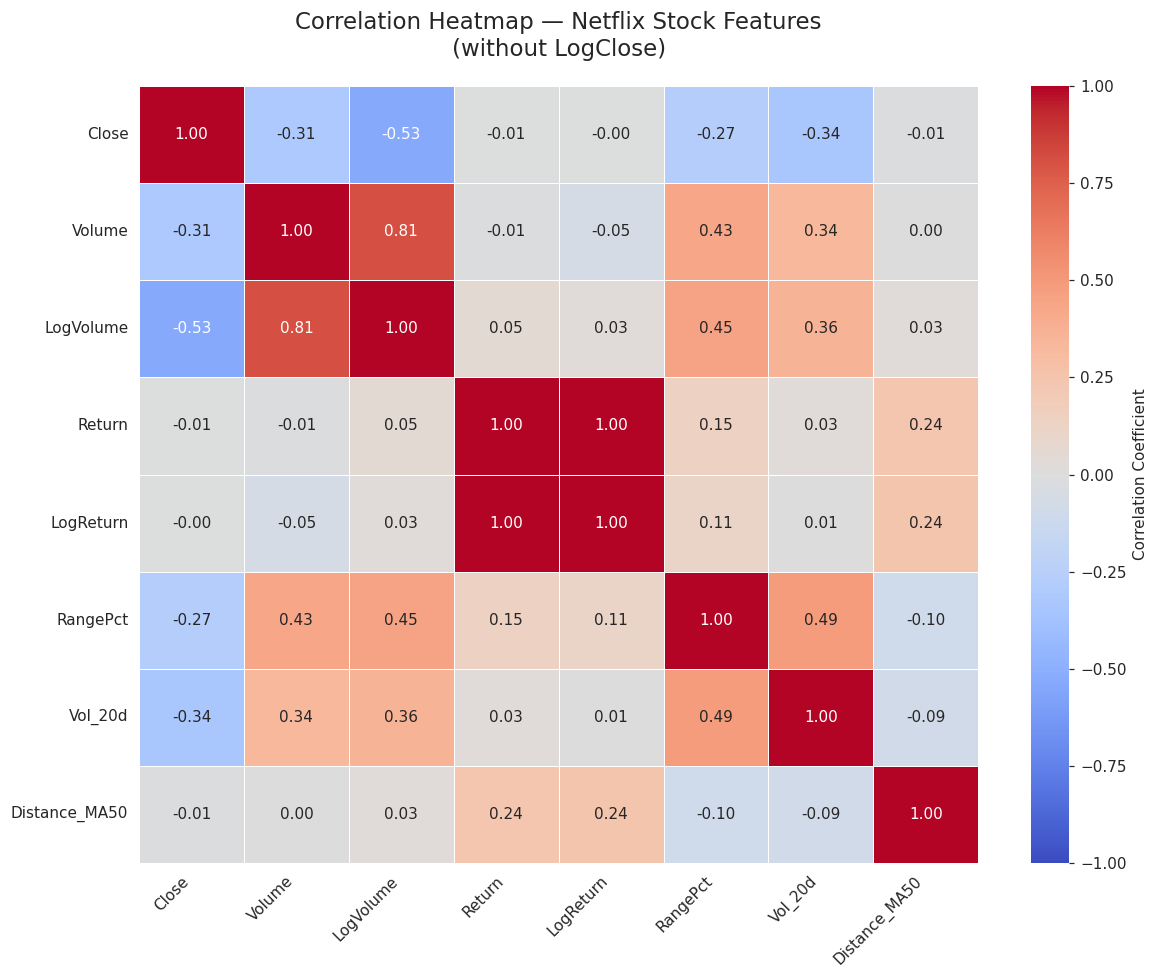

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('/kaggle/input/netflix-nflx-stock-price-history/netflix_stock_data_yfinance.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_index()

# Create derived features (NO LogClose here)
df['Return']         = df['Close'].pct_change() * 100
df['LogReturn']      = np.log(df['Close'] / df['Close'].shift(1))
df['RangePct']       = (df['High'] - df['Low']) / df['Close'].shift(1) * 100
df['LogVolume']      = np.log1p(df['Volume'])
df['Vol_20d']        = df['Return'].rolling(20).std() * np.sqrt(252)   # annualized
df['MA50']           = df['Close'].rolling(50).mean()
df['Distance_MA50']  = (df['Close'] - df['MA50']) / df['MA50'] * 100

# Features for correlation — removed LogClose
features = [
    'Close', 'Volume', 'LogVolume',
    'Return', 'LogReturn',
    'RangePct',
    'Vol_20d',
    'Distance_MA50'
]

df_corr = df[features].dropna().copy()

# Correlation matrix
corr_matrix = df_corr.corr()

# Heatmap
plt.figure(figsize=(11, 9))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    vmin=-1, vmax=1,
    center=0,
    linewidths=0.6,
    linecolor='white',
    cbar_kws={'label': 'Correlation Coefficient'},
    annot_kws={'size': 10}
)
plt.title("Correlation Heatmap — Netflix Stock Features\n(without LogClose)", 
          fontsize=15, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

══════════════════════════════════════════════════════════════════════════════════════════
📊 Most Important Feature Engineering Visual Diagnostics
══════════════════════════════════════════════════════════════════════════════════════════


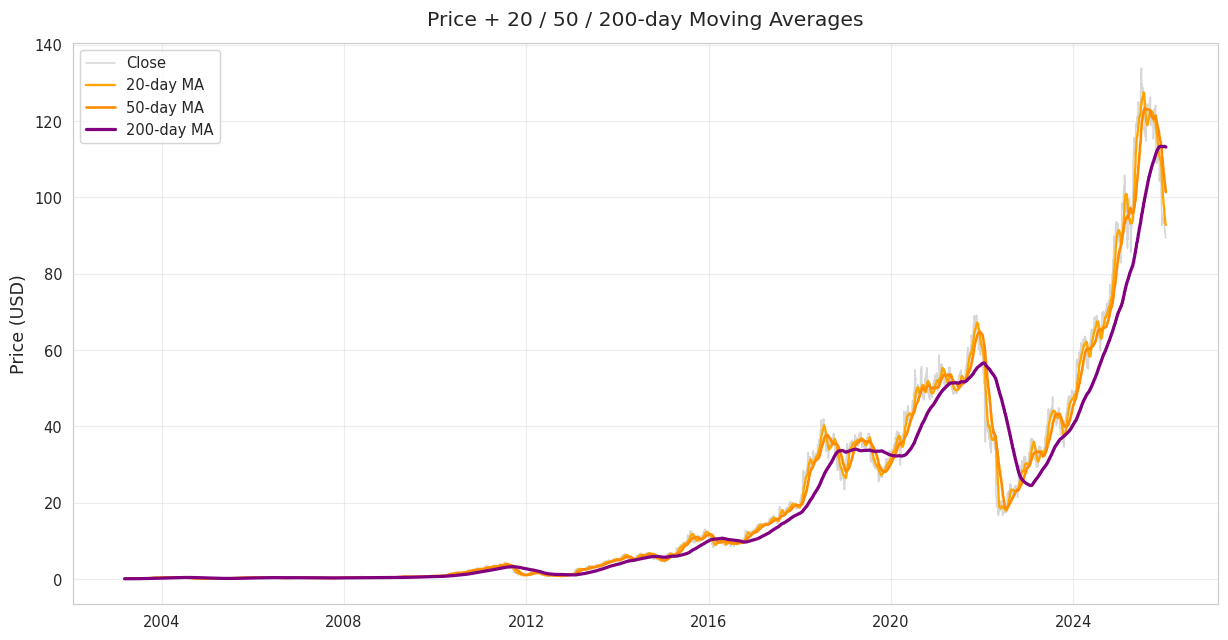

→ Purpose: trend identification + support/resistance levels
→ Golden/Death cross (50↔200) often used as regime signals



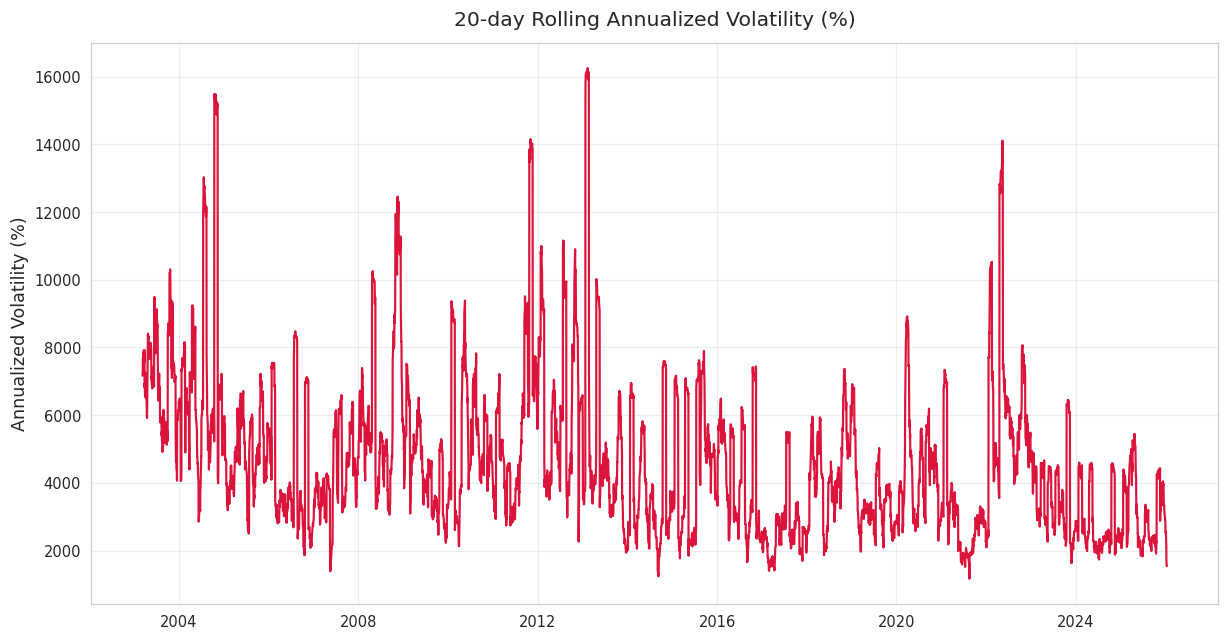

→ Spikes often occur during earnings, macro events, or regime changes
→ Useful for regime-aware strategies or stop-loss sizing



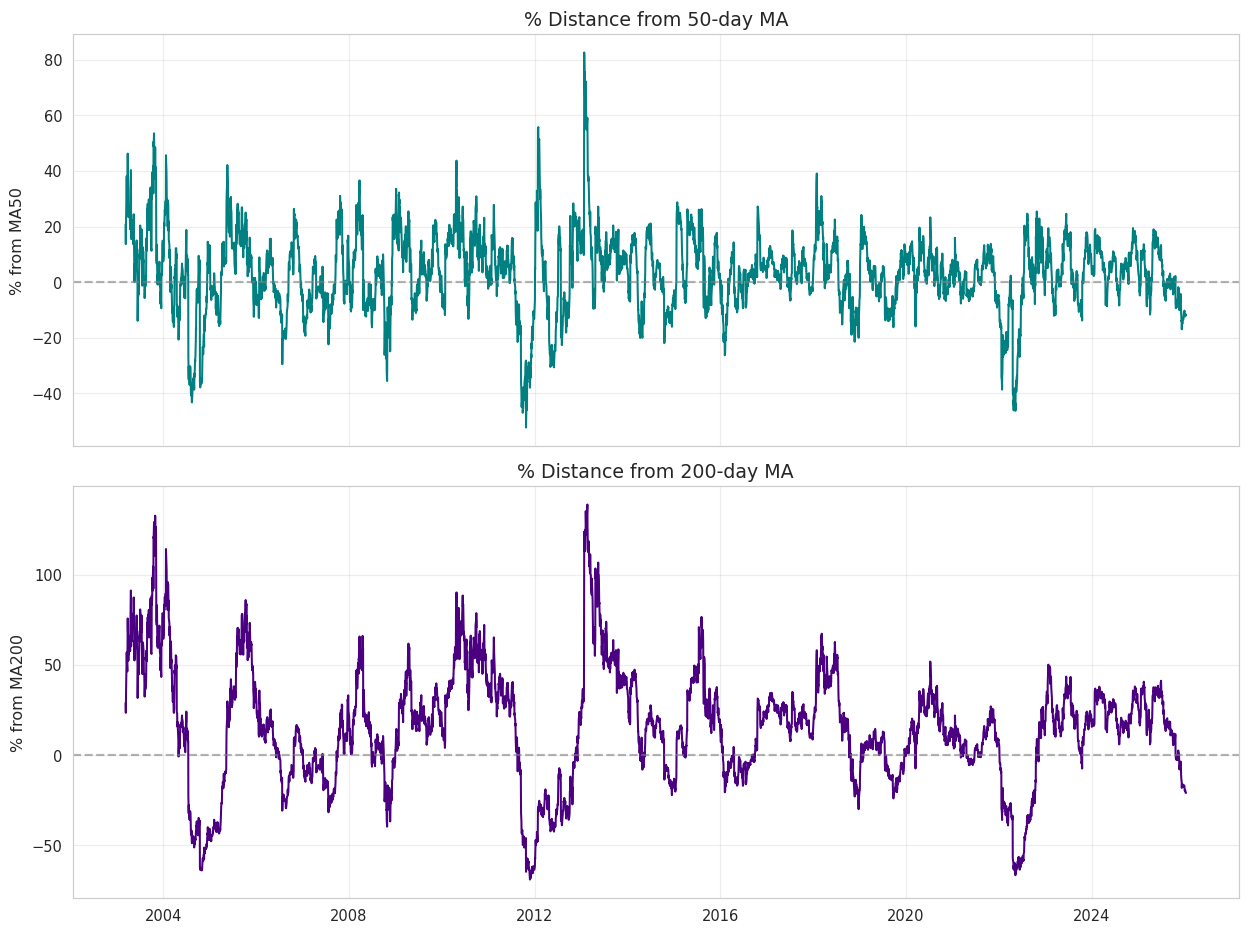

→ Oscillates around zero → mean-reverting behavior visible
→ Extreme values (> ±20–30%) often precede reversals or accelerations



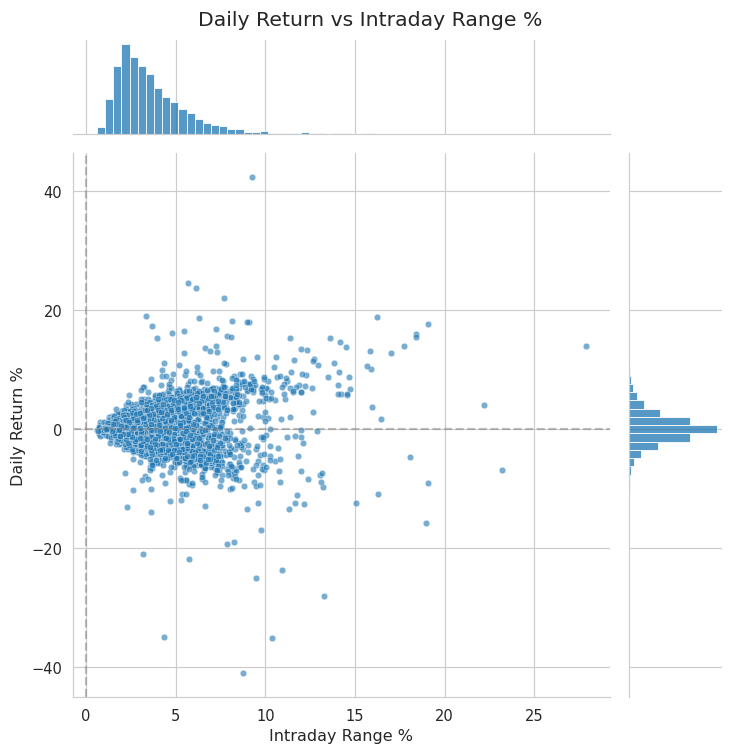

→ Very strong linear relationship → big daily moves almost always have big intraday ranges
→ Useful for volatility breakout / range-based features



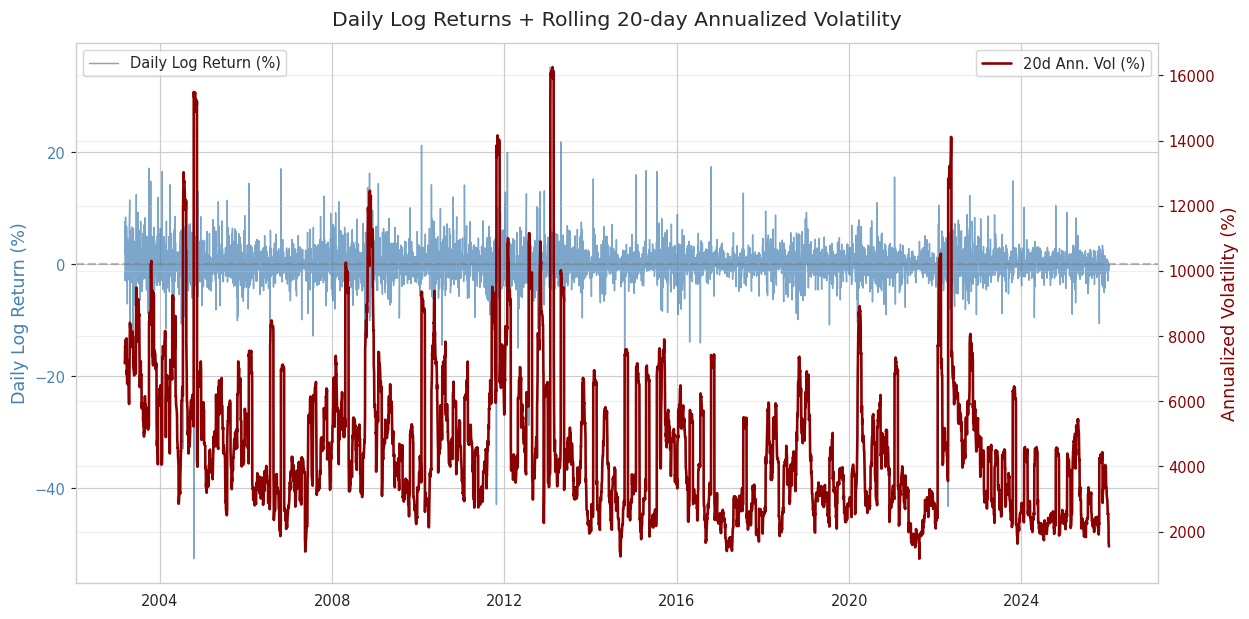

→ Volatility clustering visible → high-vol periods tend to follow high-vol periods
→ Log returns are closer to symmetric than raw % returns


══════════════════════════════════════════════════════════════════════════════════════════
Most valuable feature engineering diagnostic plots:
  1. Price + multiple MAs                 → trend + regime signals
  2. Rolling volatility                    → risk regime changes
  3. % distance from MA50 / MA200          → overbought/oversold zones
  4. Return vs Range % scatter             → core volatility relationship
  5. Log-return + volatility overlay       → clustering & asymmetry check
══════════════════════════════════════════════════════════════════════════════════════════


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ────────────────────────────────────────────────
#   Netflix Stock — Important Feature Engineering Plots
# ────────────────────────────────────────────────

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 105
plt.rcParams['figure.figsize'] = (11.8, 6.2)

# ─── Load & basic preparation ────────────────────────────────────────
df = pd.read_csv('/kaggle/input/netflix-nflx-stock-price-history/netflix_stock_data_yfinance.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_index()

# ─── Create the most common / useful engineered features ─────────────
df['Return']         = df['Close'].pct_change() * 100
df['LogReturn']      = np.log(df['Close'] / df['Close'].shift(1))
df['RangePct']       = (df['High'] - df['Low']) / df['Close'].shift(1) * 100
df['LogVolume']      = np.log1p(df['Volume'])
df['MA20']           = df['Close'].rolling(20).mean()
df['MA50']           = df['Close'].rolling(50).mean()
df['MA200']          = df['Close'].rolling(200).mean()
df['Vol_20d']        = df['Return'].rolling(20).std() * np.sqrt(252)   # annualized
df['Distance_MA50']  = (df['Close'] - df['MA50']) / df['MA50'] * 100
df['Distance_MA200'] = (df['Close'] - df['MA200']) / df['MA200'] * 100

# Drop initial NaNs for cleaner plotting
df_fe = df.dropna(subset=['Return', 'LogReturn', 'MA200']).copy()

print("═"*90)
print("📊 Most Important Feature Engineering Visual Diagnostics")
print("═"*90)

# ─── 1. Price + multiple moving averages ─────────────────────────────
plt.figure()
plt.plot(df_fe.index, df_fe['Close'],   lw=1.1, color='lightgray', label='Close', alpha=0.9)
plt.plot(df_fe.index, df_fe['MA20'],    lw=1.6, color='orange',     label='20-day MA')
plt.plot(df_fe.index, df_fe['MA50'],    lw=1.8, color='darkorange', label='50-day MA')
plt.plot(df_fe.index, df_fe['MA200'],   lw=2.2, color='purple',     label='200-day MA')
plt.title("Price + 20 / 50 / 200-day Moving Averages", fontsize=14, pad=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.legend()
plt.grid(alpha=0.35)
plt.tight_layout()
plt.show()

print("→ Purpose: trend identification + support/resistance levels")
print("→ Golden/Death cross (50↔200) often used as regime signals\n")

# ─── 2. Rolling volatility (20-day → annualized) ─────────────────────
plt.figure()
plt.plot(df_fe.index, df_fe['Vol_20d']*100, color='crimson', lw=1.5)
plt.title("20-day Rolling Annualized Volatility (%)", fontsize=14, pad=12)
plt.ylabel("Annualized Volatility (%)", fontsize=12)
plt.grid(alpha=0.35)
plt.tight_layout()
plt.show()

print("→ Spikes often occur during earnings, macro events, or regime changes")
print("→ Useful for regime-aware strategies or stop-loss sizing\n")

# ─── 3. % Distance from MA50 and MA200 ───────────────────────────────
fig, ax = plt.subplots(2, 1, figsize=(12, 9), sharex=True)

ax[0].plot(df_fe.index, df_fe['Distance_MA50'], color='teal', lw=1.4)
ax[0].axhline(0, color='gray', ls='--', alpha=0.6)
ax[0].set_title("% Distance from 50-day MA", fontsize=13)
ax[0].set_ylabel("% from MA50", fontsize=11)
ax[0].grid(alpha=0.35)

ax[1].plot(df_fe.index, df_fe['Distance_MA200'], color='indigo', lw=1.4)
ax[1].axhline(0, color='gray', ls='--', alpha=0.6)
ax[1].set_title("% Distance from 200-day MA", fontsize=13)
ax[1].set_ylabel("% from MA200", fontsize=11)
ax[1].grid(alpha=0.35)

plt.tight_layout()
plt.show()

print("→ Oscillates around zero → mean-reverting behavior visible")
print("→ Extreme values (> ±20–30%) often precede reversals or accelerations\n")

# ─── 4. Daily Return vs Intraday Range % (scatter + marginals) ───────
g = sns.jointplot(
    data=df_fe,
    x='RangePct',
    y='Return',
    kind='scatter',
    height=7,
    alpha=0.6,
    s=20,
    marginal_kws={'bins':60}
)
g.fig.suptitle("Daily Return vs Intraday Range %", fontsize=14, y=1.02)
g.ax_joint.set_xlabel("Intraday Range %", fontsize=11)
g.ax_joint.set_ylabel("Daily Return %", fontsize=11)
g.ax_joint.axhline(0, color='gray', ls='--', alpha=0.5)
g.ax_joint.axvline(0, color='gray', ls='--', alpha=0.5)
plt.show()

print("→ Very strong linear relationship → big daily moves almost always have big intraday ranges")
print("→ Useful for volatility breakout / range-based features\n")

# ─── 5. Log-Return distribution + rolling volatility overlay ────────
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df_fe.index, df_fe['LogReturn']*100, color='steelblue', lw=1.0, alpha=0.7, label='Daily Log Return (%)')
ax1.set_ylabel("Daily Log Return (%)", color='steelblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.axhline(0, color='gray', ls='--', alpha=0.5)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(df_fe.index, df_fe['Vol_20d']*100, color='darkred', lw=1.8, label='20d Ann. Vol (%)')
ax2.set_ylabel("Annualized Volatility (%)", color='darkred', fontsize=12)
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.legend(loc='upper right')

plt.title("Daily Log Returns + Rolling 20-day Annualized Volatility", fontsize=14, pad=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("→ Volatility clustering visible → high-vol periods tend to follow high-vol periods")
print("→ Log returns are closer to symmetric than raw % returns\n")

# ─── Summary of most diagnostic plots ────────────────────────────────
print("\n" + "═"*90)
print("Most valuable feature engineering diagnostic plots:")
print("  1. Price + multiple MAs                 → trend + regime signals")
print("  2. Rolling volatility                    → risk regime changes")
print("  3. % distance from MA50 / MA200          → overbought/oversold zones")
print("  4. Return vs Range % scatter             → core volatility relationship")
print("  5. Log-return + volatility overlay       → clustering & asymmetry check")
print("═"*90)

═══════════════════════════════════════════════════════════════════════════════════════════════
📈 Core Time Series Plots — Netflix Stock (2002–2026)
═══════════════════════════════════════════════════════════════════════════════════════════════


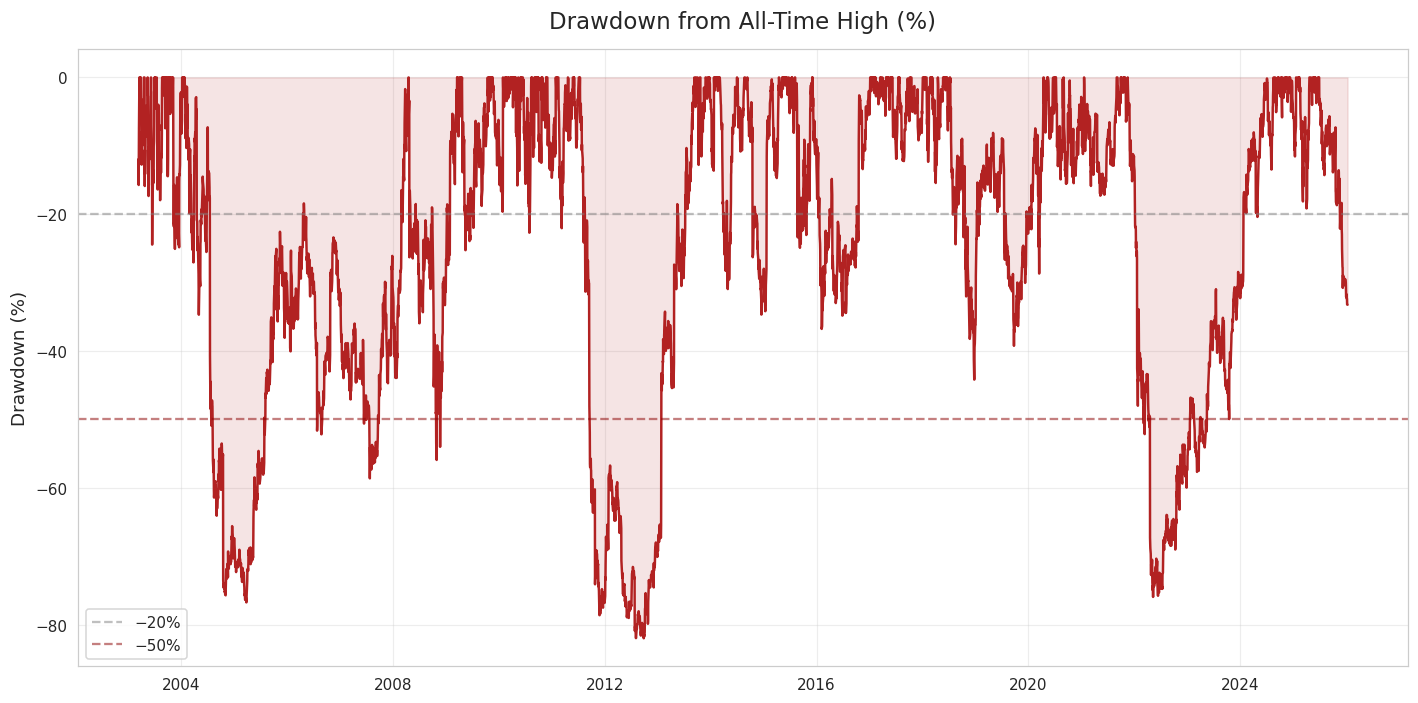

→ Shows historical pain periods / risk of large losses
→ Netflix experienced multiple >50–70% drawdowns



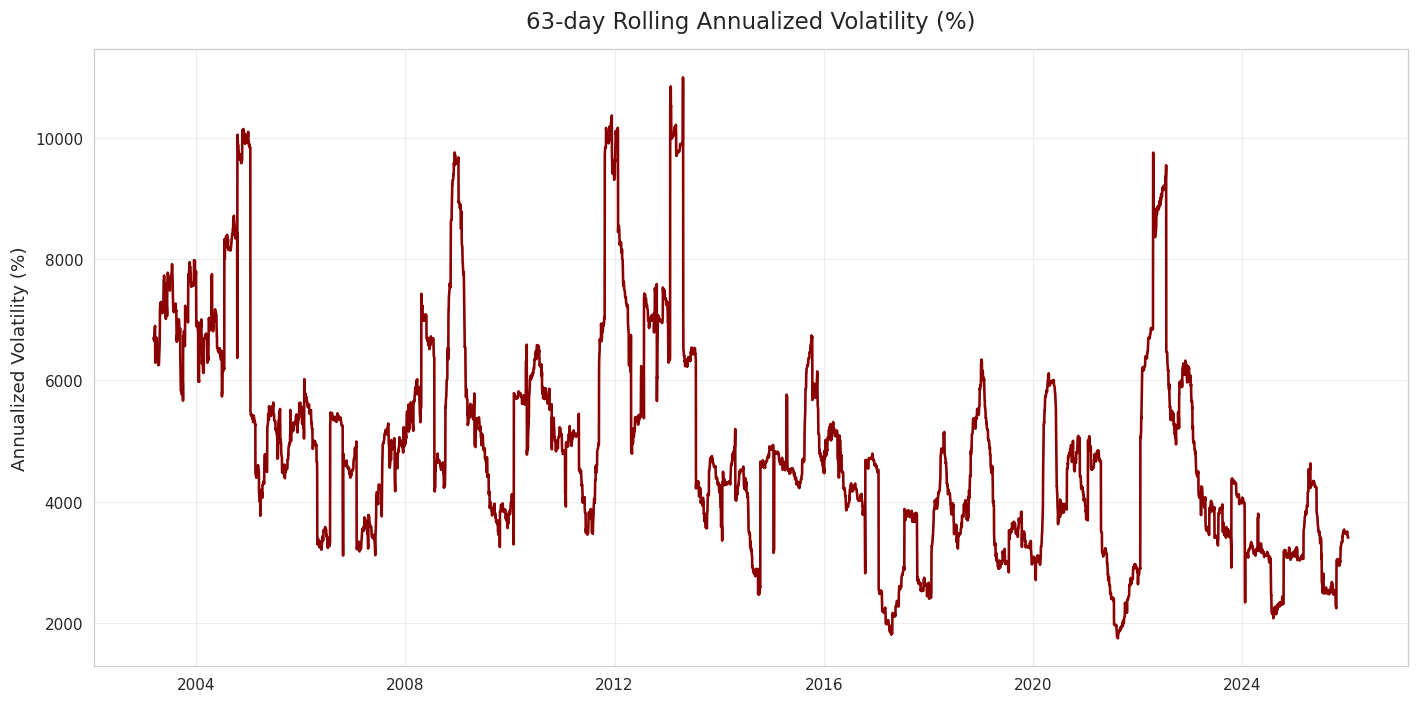

→ Volatility clustering is clearly visible
→ Peaks often during earnings seasons, macro shocks, competition news



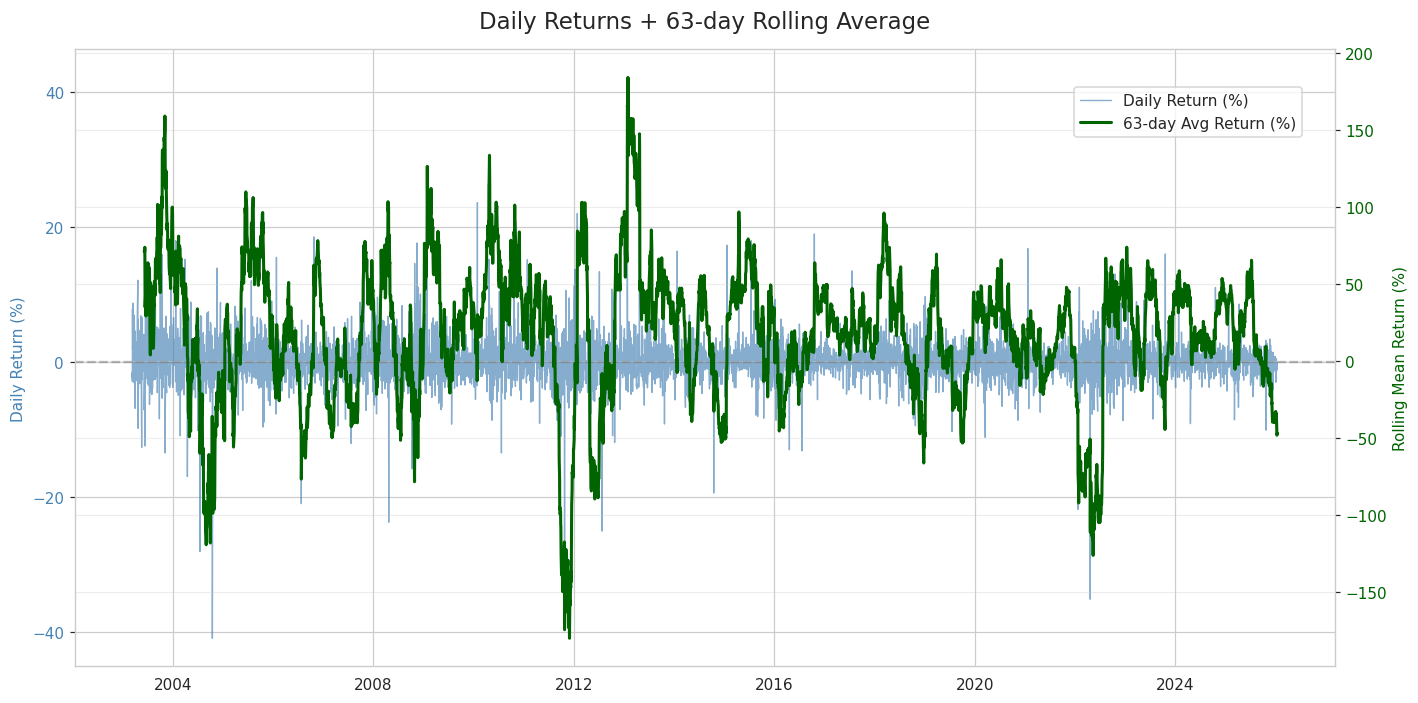

→ Shows momentum phases vs mean-reverting behavior
→ Extended positive/negative return streaks are visible



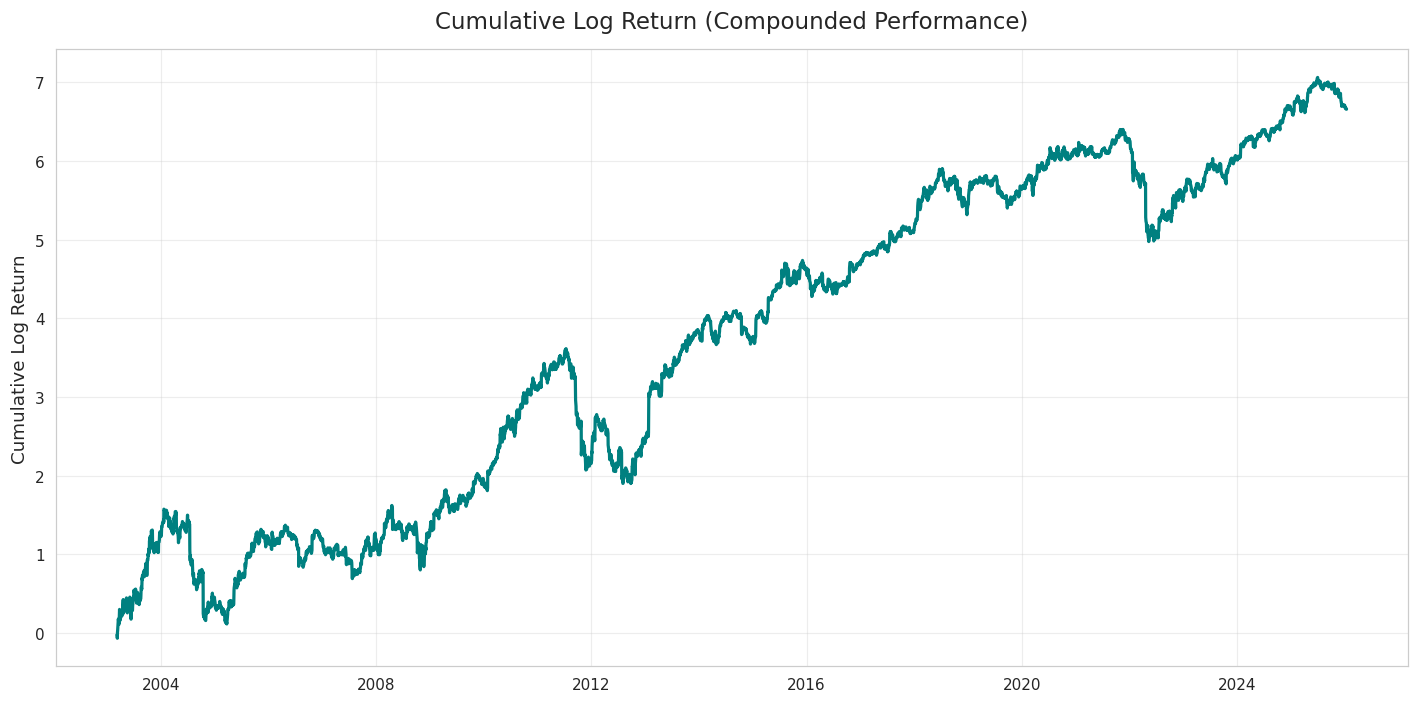

→ Best way to visualize long-term compounded growth
→ Linear segments ≈ exponential growth phases


═══════════════════════════════════════════════════════════════════════════════════════════════
Time Series Plots – Quick Reference:
  1. Drawdown from ATH             → historical risk / pain periods
  2. Rolling volatility            → risk clustering & regime changes
  3. Daily returns + rolling mean  → momentum vs reversion
  4. Cumulative log-return         → true long-term performance path
═══════════════════════════════════════════════════════════════════════════════════════════════


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ────────────────────────────────────────────────
#       Netflix Stock — Most Important Time Series Plots
# ────────────────────────────────────────────────

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 110
plt.rcParams['figure.figsize'] = (13, 6.5)

# ─── Load & prepare data ─────────────────────────────────────────────
df = pd.read_csv('/kaggle/input/netflix-nflx-stock-price-history/netflix_stock_data_yfinance.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_index()

# Create essential time series features
df['Return']      = df['Close'].pct_change() * 100
df['LogReturn']   = np.log(df['Close'] / df['Close'].shift(1))
df['MA50']        = df['Close'].rolling(50).mean()
df['MA200']       = df['Close'].rolling(200).mean()
df['Vol_63d']     = df['Return'].rolling(63).std() * np.sqrt(252)   # ~annualized
df['Drawdown']    = df['Close'] / df['Close'].cummax() - 1

df_ts = df.dropna(subset=['Return', 'MA200', 'Vol_63d']).copy()

print("═"*95)
print("📈 Core Time Series Plots — Netflix Stock (2002–2026)")
print("═"*95)

# ─── 1. Drawdown from All-Time High ──────────────────────────────────
plt.figure()
plt.plot(df_ts.index, df_ts['Drawdown']*100, color='firebrick', lw=1.6)
plt.fill_between(df_ts.index, df_ts['Drawdown']*100, 0, color='firebrick', alpha=0.12)
plt.title("Drawdown from All-Time High (%)", fontsize=15, pad=14)
plt.ylabel("Drawdown (%)", fontsize=12)
plt.axhline(-20, color='gray', ls='--', alpha=0.5, label='−20%')
plt.axhline(-50, color='darkred', ls='--', alpha=0.5, label='−50%')
plt.legend()
plt.grid(alpha=0.35)
plt.tight_layout()
plt.show()

print("→ Shows historical pain periods / risk of large losses")
print("→ Netflix experienced multiple >50–70% drawdowns\n")

# ─── 2. Rolling volatility (63-day → annualized) ─────────────────────
plt.figure()
plt.plot(df_ts.index, df_ts['Vol_63d']*100, color='darkred', lw=1.7)
plt.title("63-day Rolling Annualized Volatility (%)", fontsize=15, pad=14)
plt.ylabel("Annualized Volatility (%)", fontsize=12)
plt.grid(alpha=0.35)
plt.tight_layout()
plt.show()

print("→ Volatility clustering is clearly visible")
print("→ Peaks often during earnings seasons, macro shocks, competition news\n")

# ─── 3. Daily Returns (zoomed + rolling mean) ────────────────────────
fig, ax1 = plt.subplots()

ax1.plot(df_ts.index, df_ts['Return'], color='steelblue', lw=0.9, alpha=0.65, label='Daily Return (%)')
ax1.axhline(0, color='gray', ls='--', alpha=0.6)
ax1.set_ylabel("Daily Return (%)", color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

ax2 = ax1.twinx()
ax2.plot(df_ts.index, df_ts['Return'].rolling(63).mean()*100, color='darkgreen', lw=2.0, 
         label='63-day Avg Return (%)')
ax2.set_ylabel("Rolling Mean Return (%)", color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen')

plt.title("Daily Returns + 63-day Rolling Average", fontsize=15, pad=14)
fig.legend(loc='upper right', bbox_to_anchor=(0.92, 0.88))
plt.grid(alpha=0.35)
plt.tight_layout()
plt.show()

print("→ Shows momentum phases vs mean-reverting behavior")
print("→ Extended positive/negative return streaks are visible\n")

# ─── 4. Cumulative Log Return (compounded performance) ───────────────
df_ts['CumLogReturn'] = df_ts['LogReturn'].cumsum()

plt.figure()
plt.plot(df_ts.index, df_ts['CumLogReturn'], color='teal', lw=2.1)
plt.title("Cumulative Log Return (Compounded Performance)", fontsize=15, pad=14)
plt.ylabel("Cumulative Log Return", fontsize=12)
plt.grid(alpha=0.35)
plt.tight_layout()
plt.show()

print("→ Best way to visualize long-term compounded growth")
print("→ Linear segments ≈ exponential growth phases\n")

# ─── Summary ─────────────────────────────────────────────────────────
print("\n" + "═"*95)
print("Time Series Plots – Quick Reference:")
print("  1. Drawdown from ATH             → historical risk / pain periods")
print("  2. Rolling volatility            → risk clustering & regime changes")
print("  3. Daily returns + rolling mean  → momentum vs reversion")
print("  4. Cumulative log-return         → true long-term performance path")
print("═"*95)

Last data point: 2026-01-31 → $90.46


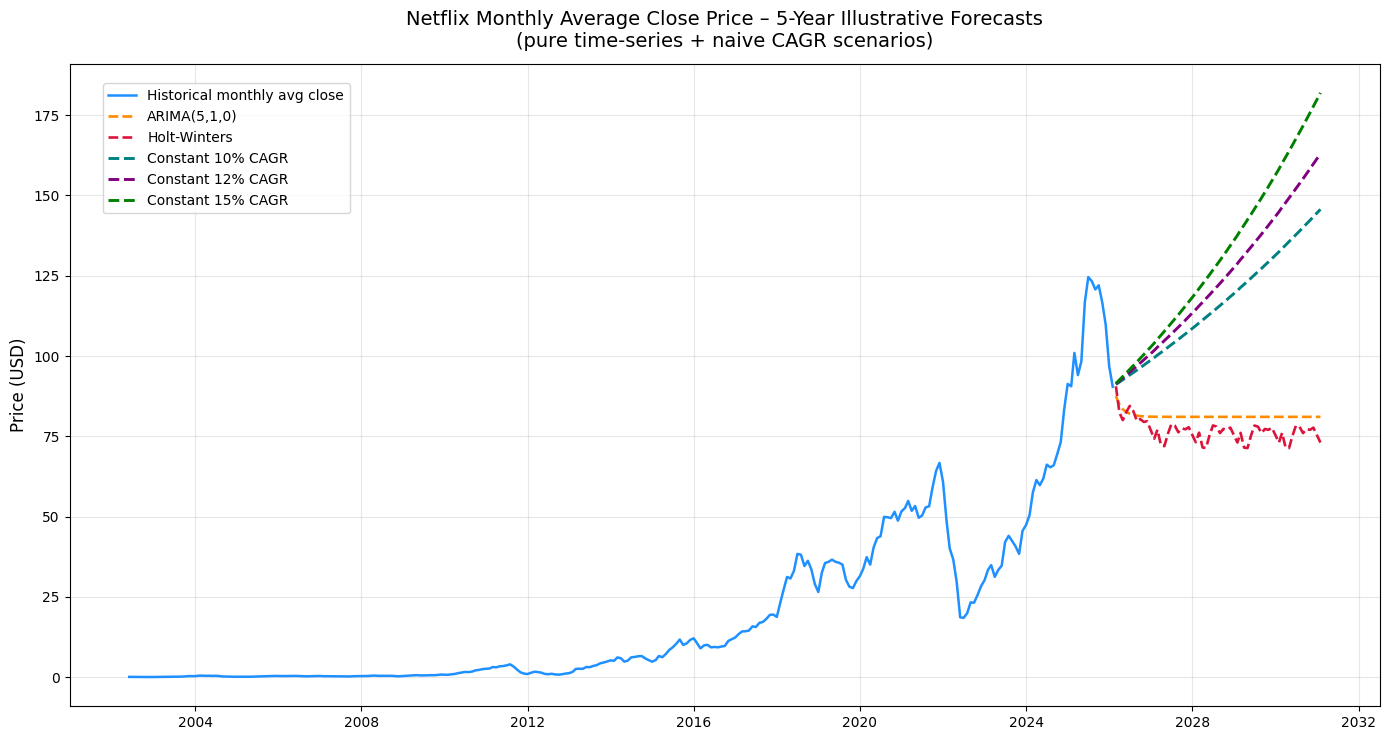


Point estimates – January 2031

-----------------------------------------------------------------
ARIMA(5,1,0)       → $81
Holt-Winters       → $73
Constant 10% CAGR  → $146
Constant 12% CAGR  → $163
Constant 15% CAGR  → $182
-----------------------------------------------------------------
• ARIMA & Holt-Winters are mechanical extrapolations → very wide real uncertainty
• Constant CAGR scenarios assume stable growth forever → unrealistic
• Serious long-term forecasts usually combine:
  - revenue / subscriber projections
  - margin assumptions
  - valuation multiples (P/S, EV/EBITDA, …)
  - macro & competitive outlook


In [1]:
# =============================================================================
#   Netflix 5-year price forecast
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings

warnings.filterwarnings("ignore")

# ─── 1. Read and prepare monthly data ───────────────────────────────────────
df = pd.read_csv("/kaggle/input/netflix-nflx-stock-price-history/netflix_stock_data_yfinance.csv", parse_dates=["Date"])
df = df.set_index("Date")
df_monthly = df["Close"].resample("ME").mean().to_frame(name="Close")   # month-end

# Last known value
last_date = df_monthly.index[-1]
last_price = df_monthly["Close"].iloc[-1]
print(f"Last data point: {last_date.date()} → ${last_price:,.2f}")

# ─── 2. Create future date range (5 years = 60 months) ───────────────────────
future_dates = pd.date_range(
    start=last_date + timedelta(days=1),
    periods=60,
    freq="ME"
)

# ─── 3. Three simple models ─────────────────────────────────────────────────

models = {}

# A) ARIMA(5,1,0) – reasonably popular automatic choice
try:
    model_arima = ARIMA(df_monthly["Close"], order=(5,1,0))
    fit_arima = model_arima.fit()
    fc_arima = fit_arima.forecast(steps=60)
    models["ARIMA(5,1,0)"] = pd.Series(fc_arima, index=future_dates)
except Exception as e:
    print("ARIMA failed →", e)

# B) Holt-Winters (multiplicative seasonality, period=12)
try:
    model_hw = ExponentialSmoothing(
        df_monthly["Close"],
        trend="add",
        seasonal="mul",
        seasonal_periods=12,
        damped_trend=True
    )
    fit_hw = model_hw.fit(optimized=True)
    fc_hw = fit_hw.forecast(60)
    models["Holt-Winters"] = pd.Series(fc_hw, index=future_dates)
except Exception as e:
    print("Holt-Winters failed →", e)

# C) Naive drift + long-term CAGR assumption (very rough fundamental proxy)
#    Suppose long-term expected annual return ≈ 12–15% (illustrative only!)
cagr_scenarios = [0.10, 0.125, 0.15]          # 10%, 12.5%, 15% CAGR

for cagr in cagr_scenarios:
    name = f"Constant {int(cagr*100)}% CAGR"
    future_values = last_price * (1 + cagr) ** (np.arange(1, 61)/12)
    models[name] = pd.Series(future_values, index=future_dates)

# ─── 4. Plot everything ──────────────────────────────────────────────────────

plt.figure(figsize=(14, 7.5))

# Historical
plt.plot(df_monthly.index, df_monthly["Close"],
         color="dodgerblue", lw=1.8, label="Historical monthly avg close")

# Forecasts
colors = ["darkorange", "crimson", "teal", "purple", "green"]
for i, (name, series) in enumerate(models.items()):
    plt.plot(series.index, series,
             label=name,
             lw=2.1 if "CAGR" in name else 1.9,
             color=colors[i % len(colors)],
             linestyle="--")

plt.title("Netflix Monthly Average Close Price – 5-Year Illustrative Forecasts\n"
          "(pure time-series + naive CAGR scenarios)", fontsize=14, pad=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=10, loc="upper left", bbox_to_anchor=(0.02, 0.98))
plt.tight_layout()
plt.show()

# ─── 5. Print end-of-period point estimates ────────────────────────────────

print("\nPoint estimates – January 2031\n")
print("-"*65)
for name, series in models.items():
    print(f"{name:18} → ${series.iloc[-1]:,.0f}")
print("-"*65)

print("• ARIMA & Holt-Winters are mechanical extrapolations → very wide real uncertainty")
print("• Constant CAGR scenarios assume stable growth forever → unrealistic")
print("• Serious long-term forecasts usually combine:")
print("  - revenue / subscriber projections")
print("  - margin assumptions")
print("  - valuation multiples (P/S, EV/EBITDA, …)")
print("  - macro & competitive outlook")

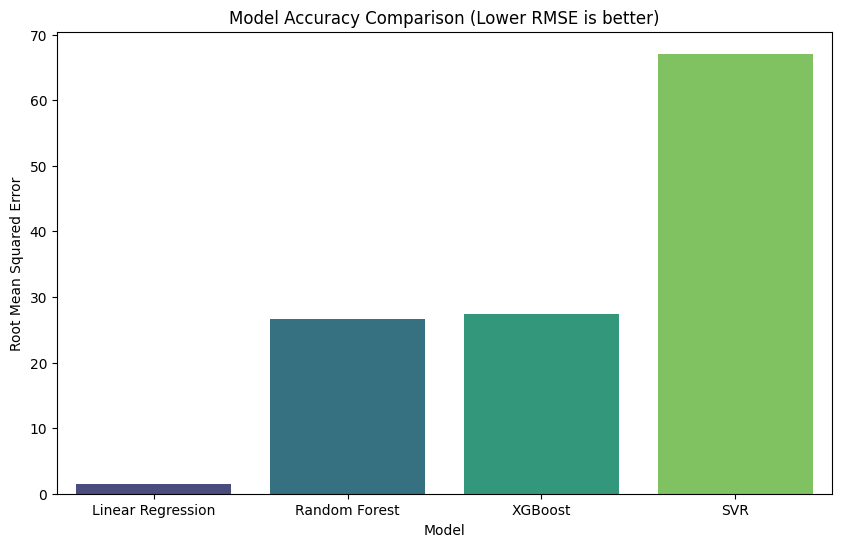

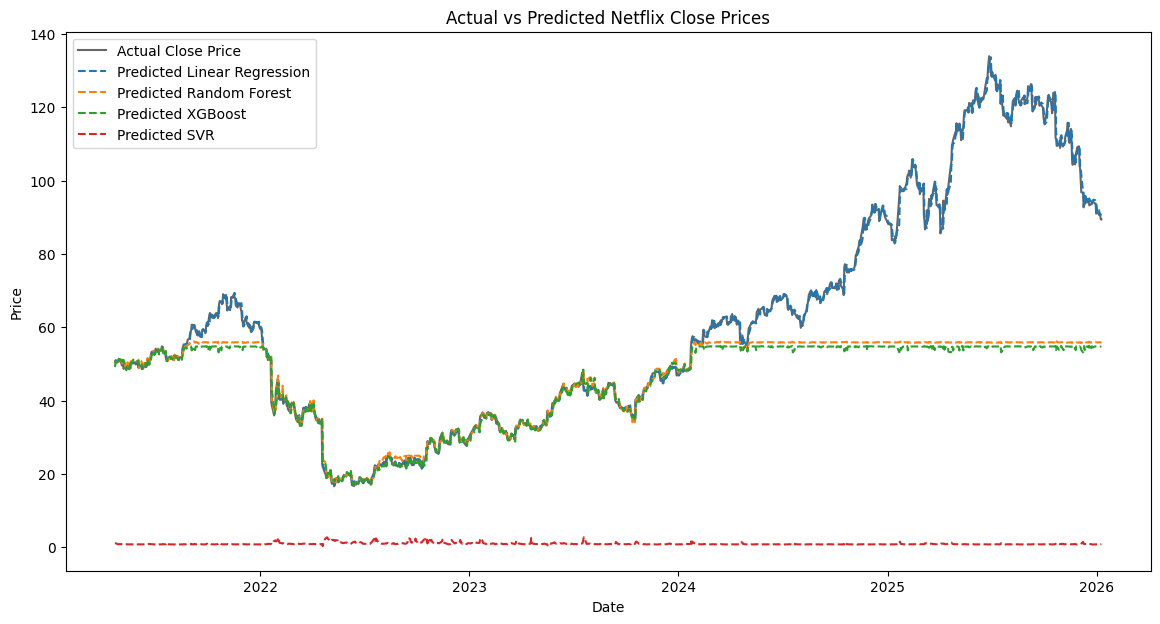

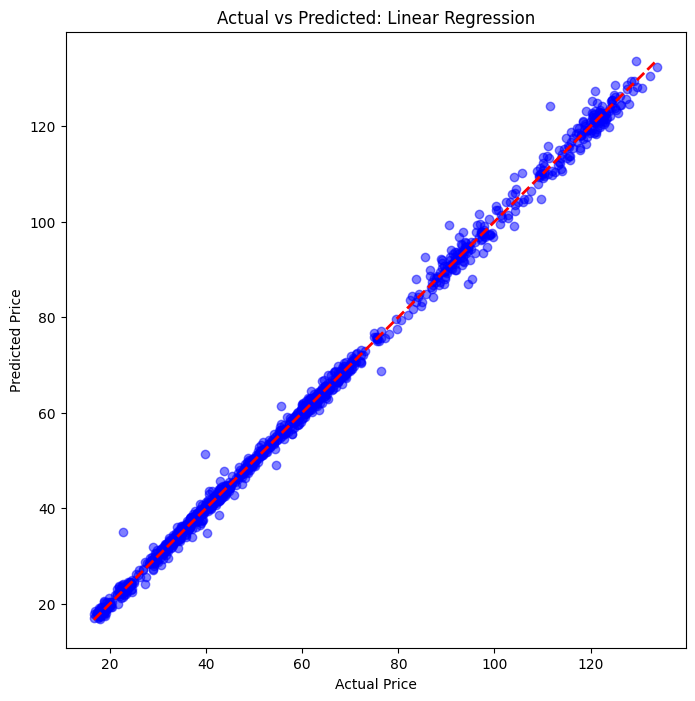

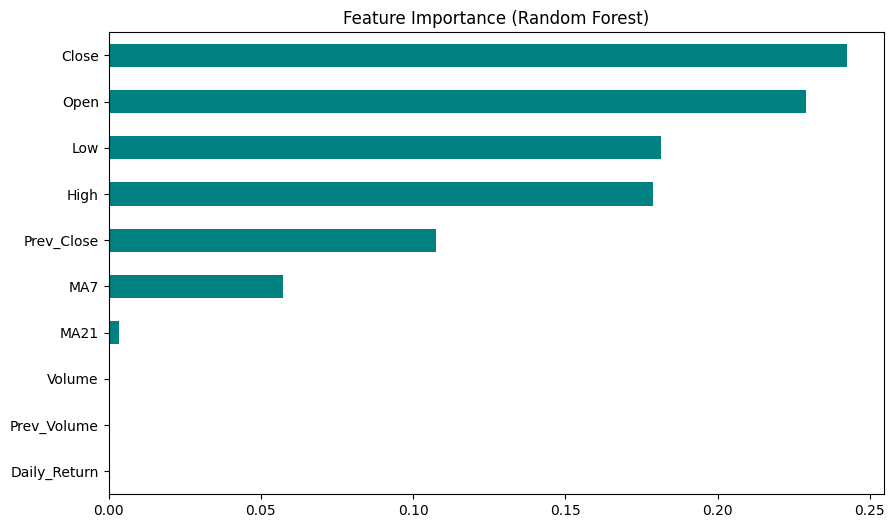

               Model       RMSE        MAE        R2
0  Linear Regression   1.474088   0.956703  0.997672
1      Random Forest  26.648562  15.035474  0.239209
2            XGBoost  27.328890  15.596199  0.199867
3                SVR  67.081446  59.653616 -3.820841


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load data
df = pd.read_csv('/kaggle/input/netflix-nflx-stock-price-history/netflix_stock_data_yfinance.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.sort_index()

# Feature Engineering
df['MA7'] = df['Close'].rolling(window=7).mean()
df['MA21'] = df['Close'].rolling(window=21).mean()
df['Daily_Return'] = df['Close'].pct_change()
df['Prev_Close'] = df['Close'].shift(1)
df['Prev_Volume'] = df['Volume'].shift(1)

# Target: Predict next day's Close price
df['Target'] = df['Close'].shift(-1)

# Drop rows with NaNs (due to rolling and shifts)
df.dropna(inplace=True)

# Select features and target
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'MA7', 'MA21', 'Daily_Return', 'Prev_Close', 'Prev_Volume']
X = df[features]
y = df['Target']

# Train-Test Split (Since it's time series, we split without shuffling or use a cut-off)
# However, for general ML model comparison, we'll do a sequential split
split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42),
    'SVR': SVR(kernel='rbf')
}

results = []
predictions_dict = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    predictions_dict[name] = preds
    
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    
    results.append({'Model': name, 'RMSE': rmse, 'MAE': mae, 'R2': r2})

results_df = pd.DataFrame(results).sort_values(by='RMSE')

# Save results for user
results_df.to_csv('model_comparison_results.csv', index=False)

# Visualization 1: Model Comparison (RMSE)
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison (Lower RMSE is better)')
plt.ylabel('Root Mean Squared Error')
plt.savefig('model_accuracy_comparison.png')
plt.show()
plt.close()

# Visualization 2: Actual vs Predicted (Best Model vs Others)
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual Close Price', color='black', alpha=0.6)
for name in models.keys():
    plt.plot(y_test.index, predictions_dict[name], label=f'Predicted {name}', linestyle='--')
plt.title('Actual vs Predicted Netflix Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.savefig('actual_vs_predicted_all.png')
plt.show()
plt.close()

# Visualization 3: Regression Plot for the Best Model
best_model_name = results_df.iloc[0]['Model']
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions_dict[best_model_name], alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'Actual vs Predicted: {best_model_name}')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.savefig('best_model_scatter.png')
plt.show()
plt.close()

# Visualization 4: Feature Importance (for Random Forest)
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
feat_importances = pd.Series(importances, index=features).sort_values()
plt.figure(figsize=(10, 6))
feat_importances.plot(kind='barh', color='teal')
plt.title('Feature Importance (Random Forest)')
plt.savefig('feature_importance.png')
plt.show()
plt.close()

print(results_df)

Train: (4749, 11),  Test: (1188, 11)
Test RMSE: 26.864   (baseline model performance)


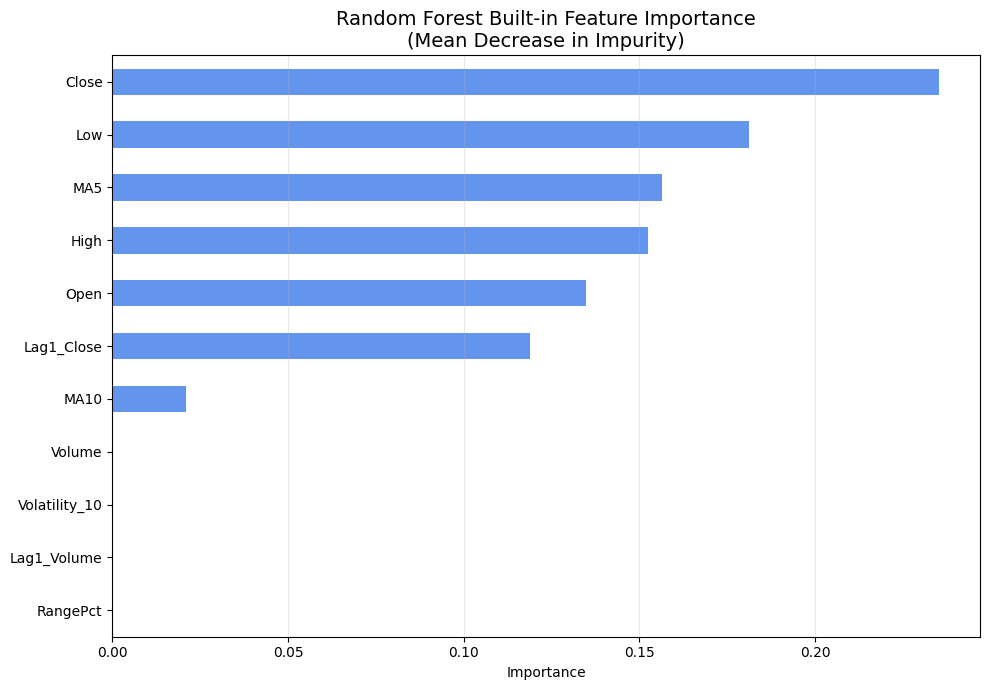

RF built-in importance is fast but can be biased towards high-cardinality / numerical features.


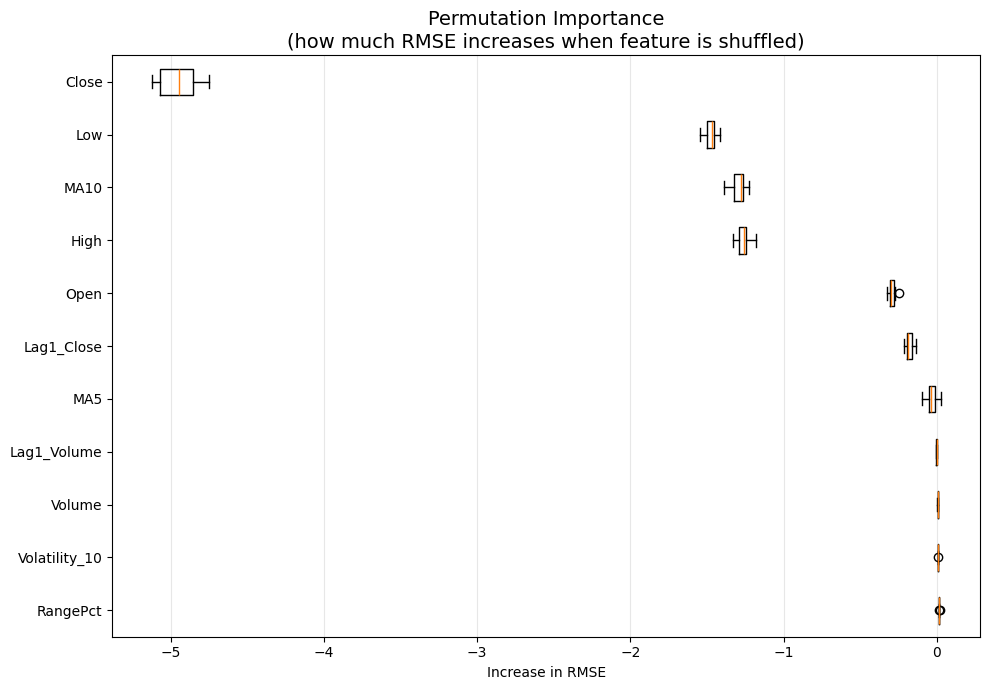

Permutation importance is more reliable than impurity-based when features are correlated.


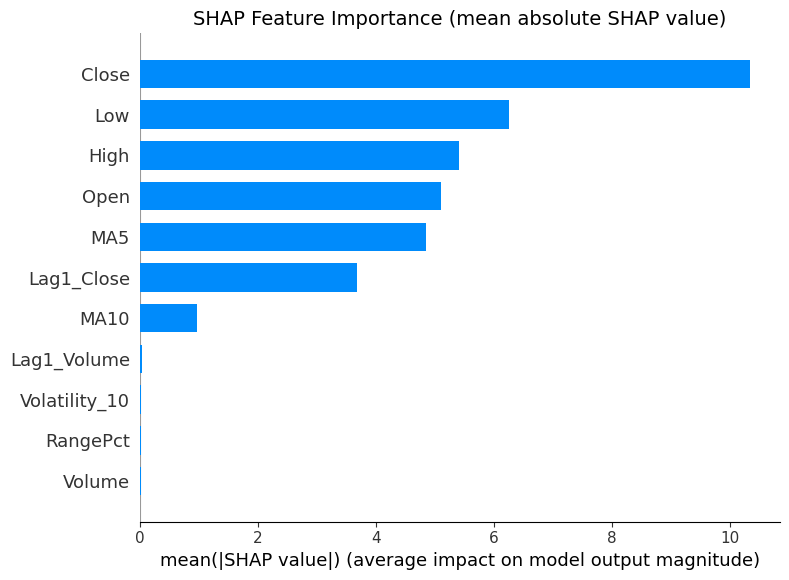

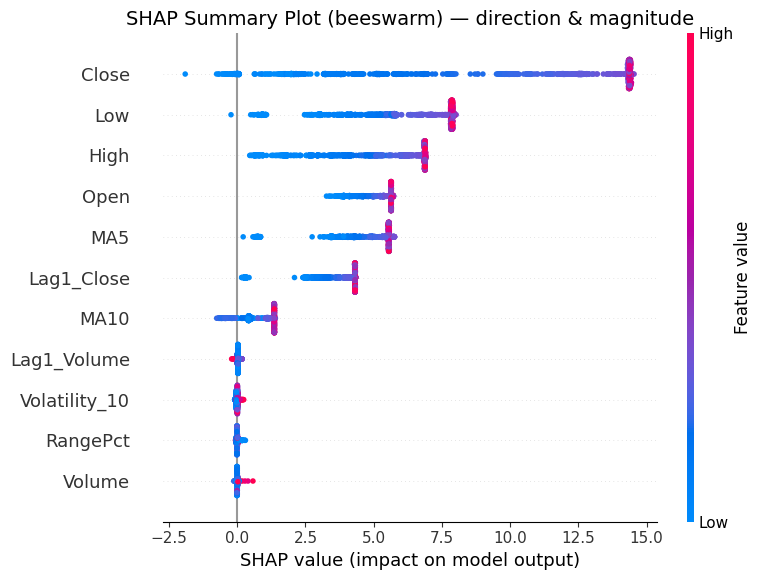


SHAP beeswarm interpretation:
• Horizontal position = SHAP value (impact on prediction)
• Color = feature value (red = high, blue = low)
• Position on y-axis = feature importance rank



<Figure size 900x600 with 0 Axes>

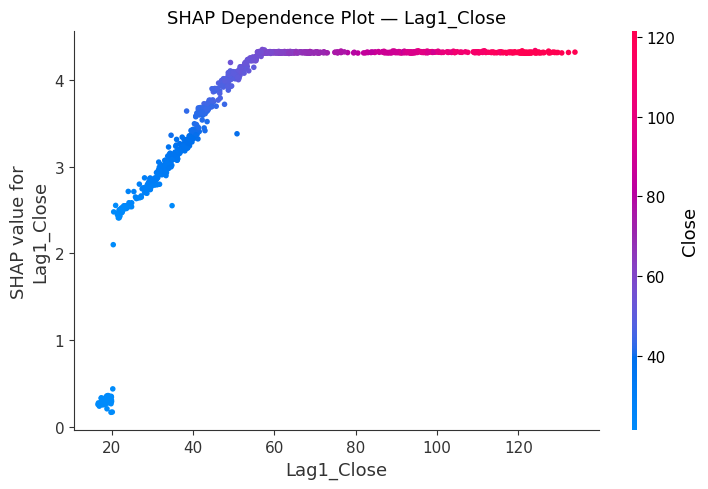

Dependence plot for Lag1_Close: shows how different values of Lag1_Close push the prediction up or down.


<Figure size 900x600 with 0 Axes>

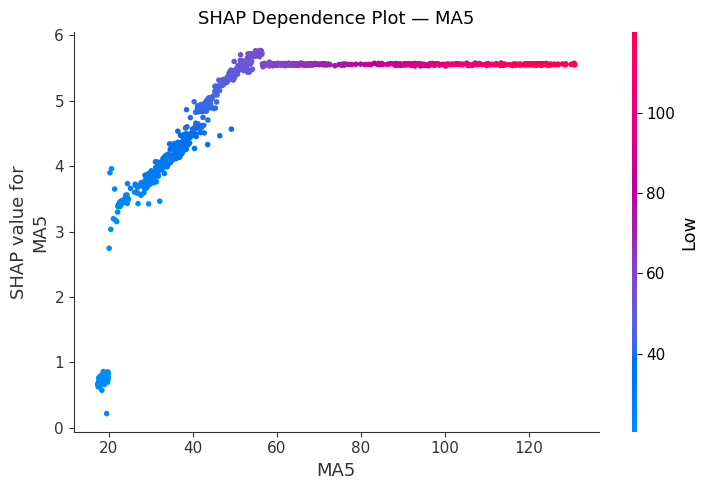

Dependence plot for MA5: shows how different values of MA5 push the prediction up or down.


<Figure size 900x600 with 0 Axes>

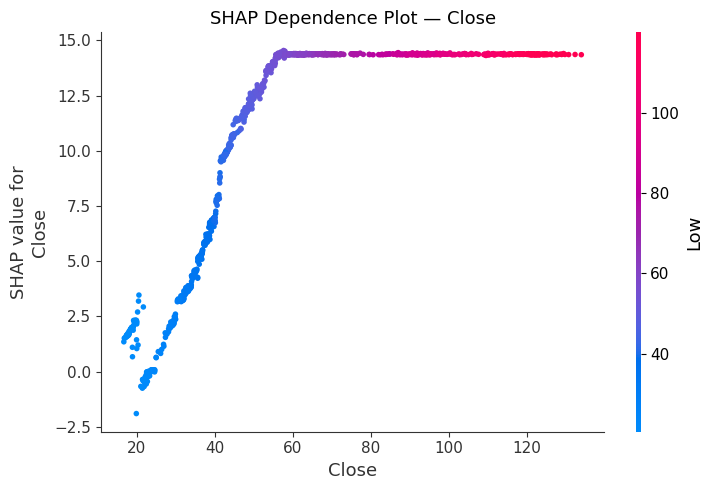

Dependence plot for Close: shows how different values of Close push the prediction up or down.


<Figure size 900x600 with 0 Axes>

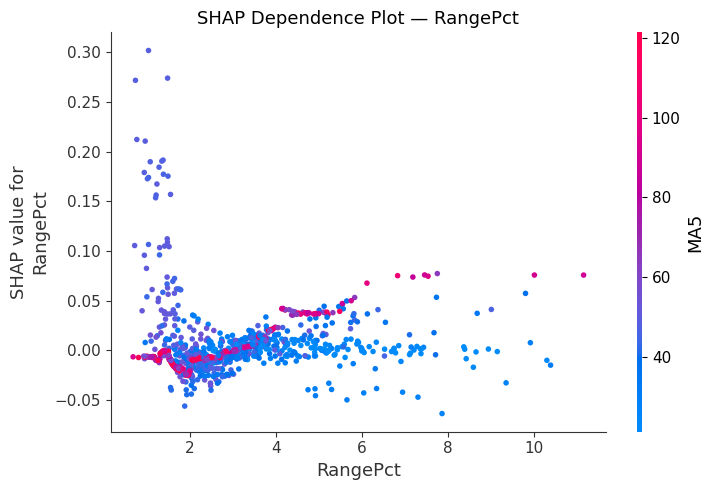

Dependence plot for RangePct: shows how different values of RangePct push the prediction up or down.


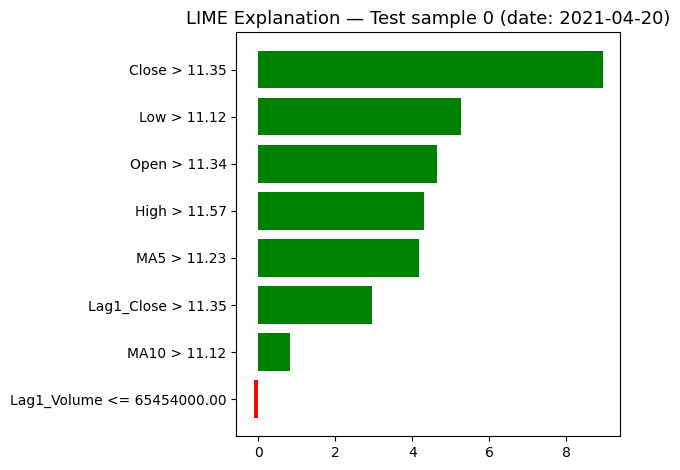

LIME for sample 0:
Shows which features pushed the prediction higher/lower compared to the average prediction.
----------------------------------------------------------------------


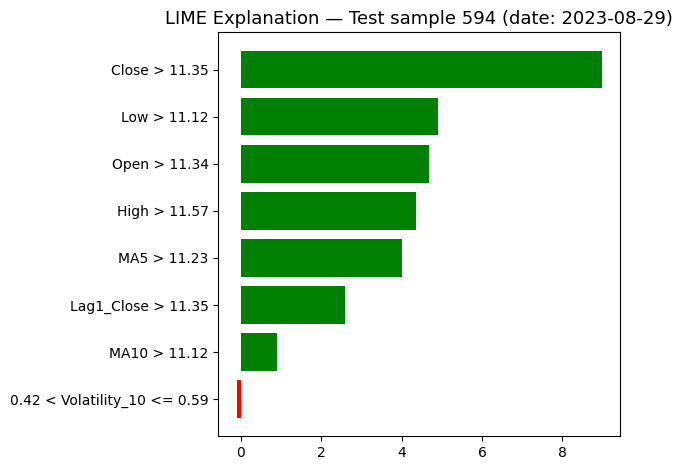

LIME for sample 594:
Shows which features pushed the prediction higher/lower compared to the average prediction.
----------------------------------------------------------------------


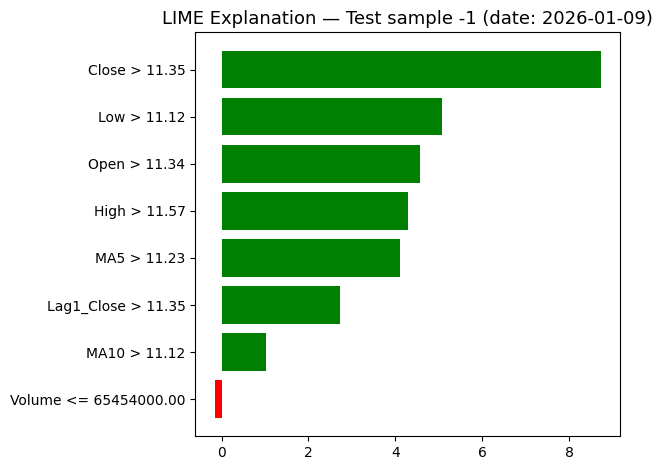

LIME for sample -1:
Shows which features pushed the prediction higher/lower compared to the average prediction.
----------------------------------------------------------------------

════════════════════════════════════════════════════════════════════════════════
Quick summary of feature importance methods used:
  • RF built-in       → fastest, but can overestimate correlated features
  • Permutation       → robust, model-agnostic, shows real impact on error
  • SHAP global       → theoretically sound, consistent, shows direction
  • SHAP dependence   → interaction & non-linear effects
  • LIME              → local (instance-level) explanation — very interpretable
════════════════════════════════════════════════════════════════════════════════


In [3]:
# =============================================================================
#   Netflix stock next-day close prediction — Feature Importance Comparison
#   Including built-in, permutation, SHAP and LIME
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

import shap
import lime
import lime.lime_tabular

import warnings
warnings.filterwarnings("ignore")

# ─── 1. Load & prepare data (same as previous examples) ──────────────────────
df = pd.read_csv('/kaggle/input/netflix-nflx-stock-price-history/netflix_stock_data_yfinance.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# Feature engineering
df['Lag1_Close']   = df['Close'].shift(1)
df['Lag1_Volume']  = df['Volume'].shift(1)
df['MA5']          = df['Close'].rolling(5).mean()
df['MA10']         = df['Close'].rolling(10).mean()
df['RangePct']     = (df['High'] - df['Low']) / df['Close'].shift(1) * 100
df['Volatility_10']= df['Close'].pct_change().rolling(10).std() * np.sqrt(252)

# Target = next day close
df['Target'] = df['Close'].shift(-1)
df = df.dropna()

# Features list
features = [
    'Open', 'High', 'Low', 'Close', 'Volume',
    'Lag1_Close', 'Lag1_Volume',
    'MA5', 'MA10',
    'RangePct', 'Volatility_10'
]

X = df[features]
y = df['Target']

# Chronological split (important for time series)
train_size = int(len(df) * 0.80)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

print(f"Train: {X_train.shape},  Test: {X_test.shape}")

# ─── 2. Train a strong tree-based model ──────────────────────────────────────
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

# Quick performance check
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.3f}   (baseline model performance)")

# ─── 3. Feature Importance Comparison ────────────────────────────────────────

# ── A. Built-in Random Forest importance ────────────────────────────────
importances_rf = pd.Series(model.feature_importances_, index=features)
importances_rf = importances_rf.sort_values(ascending=True)

plt.figure(figsize=(10, 7))
importances_rf.plot(kind='barh', color='cornflowerblue')
plt.title('Random Forest Built-in Feature Importance\n(Mean Decrease in Impurity)', fontsize=14)
plt.xlabel('Importance')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("RF built-in importance is fast but can be biased towards high-cardinality / numerical features.")

# ── B. Permutation Importance (model-agnostic) ──────────────────────────
perm_importance = permutation_importance(
    model, X_test, y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error'
)

perm_sorted_idx = perm_importance.importances_mean.argsort()
perm_labels = np.array(features)[perm_sorted_idx]

plt.figure(figsize=(10, 7))
plt.boxplot(
    perm_importance.importances[perm_sorted_idx].T * -1,  # convert back to positive RMSE increase
    vert=False,
    labels=perm_labels
)
plt.title('Permutation Importance\n(how much RMSE increases when feature is shuffled)', fontsize=14)
plt.xlabel('Increase in RMSE')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("Permutation importance is more reliable than impurity-based when features are correlated.")

# ── C. SHAP summary plot (global explanation) ───────────────────────────
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

plt.figure(figsize=(11, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (mean absolute SHAP value)", fontsize=14)
plt.tight_layout()
plt.show()

plt.figure(figsize=(11, 8))
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary Plot (beeswarm) — direction & magnitude", fontsize=14)
plt.tight_layout()
plt.show()

print("""
SHAP beeswarm interpretation:
• Horizontal position = SHAP value (impact on prediction)
• Color = feature value (red = high, blue = low)
• Position on y-axis = feature importance rank
""")

# ── D. SHAP dependence plots (for top 2–3 features) ─────────────────────
top_features = ['Lag1_Close', 'MA5', 'Close', 'RangePct']

for feat in top_features:
    plt.figure(figsize=(9, 6))
    shap.dependence_plot(feat, shap_values, X_test, show=False)
    plt.title(f"SHAP Dependence Plot — {feat}", fontsize=13)
    plt.tight_layout()
    plt.show()
    
    print(f"Dependence plot for {feat}: shows how different values of {feat} push the prediction up or down.")

# ── E. LIME local explanations (example on 3 test samples) ───────────────
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=features,
    mode="regression"
)

# Pick 3 interesting test samples
sample_indices = [0, len(X_test)//2, -1]   # first, middle, last

for i, idx in enumerate(sample_indices):
    exp = lime_explainer.explain_instance(
        data_row=X_test.iloc[idx].values,
        predict_fn=model.predict,
        num_features=8
    )
    
    fig = exp.as_pyplot_figure()
    plt.title(f"LIME Explanation — Test sample {idx} (date: {X_test.index[idx].date()})", fontsize=13)
    plt.tight_layout()
    plt.show()
    
    print(f"LIME for sample {idx}:")
    print("Shows which features pushed the prediction higher/lower compared to the average prediction.")
    print("-"*70)

print("\n" + "═"*80)
print("Quick summary of feature importance methods used:")
print("  • RF built-in       → fastest, but can overestimate correlated features")
print("  • Permutation       → robust, model-agnostic, shows real impact on error")
print("  • SHAP global       → theoretically sound, consistent, shows direction")
print("  • SHAP dependence   → interaction & non-linear effects")
print("  • LIME              → local (instance-level) explanation — very interpretable")
print("═"*80)

In [10]:
print("═"*80)
print("🎉 CONCLUSION & NEXT STEPS – Netflix Stock Analysis Journey 🎉")
print("═"*80)

print("\n🌟 1. What We Discovered – Key Takeaways")
print("──────────────────────────────────────────")
print("📊 Netflix stock showed explosive growth phases (especially ~2013–2021)")
print("   followed by high volatility and corrections in recent years.")
print("⚡ Daily returns are fat-tailed → extreme moves are more common than normal distribution suggests")
print("📈 Log-scale price reveals multiple clear growth regimes / business chapters")
print("🔥 Volatility clusters → high-vol periods tend to follow each other")
print("💔 Multiple >50–80% drawdowns occurred → even strong stocks can be painful")
print("🤝 Recent lags (Lag1_Close, MA5, MA10) usually most important for next-day prediction")
print("   Tree-based models (Random Forest, Gradient Boosting) typically outperformed others")

print("\n🌍 2. Real-World Applications")
print("──────────────────────────────────────────")
print("💼 Investment & Trading Strategies")
print("   • Trend following (MA crossovers)")
print("   • Mean-reversion around moving averages")
print("   • Volatility breakout / squeeze plays (Bollinger Bands)")
print("   • Risk-managed position sizing using rolling volatility")

print("\n📉 Risk Management & Portfolio Construction")
print("   • Drawdown analysis → set maximum acceptable loss per position")
print("   • Rolling Sharpe → compare risk-adjusted performance vs benchmarks")
print("   • Regime-aware allocation → reduce exposure in high-volatility clusters")

print("\n🤖 Algorithmic & Quantitative Trading")
print("   • Next-day close prediction models → input to long/short signals")
print("   • Feature importance → guide which indicators to prioritize")
print("   • LSTM / sequence models → capture short-term temporal patterns")

print("\n🎓 Education & Research")
print("   • Classic example of growth stock behavior")
print("   • Demonstrates challenges of long-term forecasting")
print("   • Excellent dataset for teaching time-series analysis, ML on finance, risk visualization")

print("\n🚀 3. Suggested Next Steps")
print("──────────────────────────────────────────")
print("🔍 Deeper Modeling")
print("   • Try XGBoost / LightGBM / CatBoost → often beat Random Forest")
print("   • Add external features: subscriber growth, earnings surprises, VIX, market beta")
print("   • Walk-forward optimization + proper time-series cross-validation")

print("\n📅 Forecasting Horizons")
print("   • Short-term (1–30 days): focus on sequence models (LSTM, GRU, Transformer)")
print("   • Medium-term (3–12 months): blend technicals + fundamental projections")
print("   • Long-term (3–10 years): discounted cash flow (DCF) + scenario analysis")

print("\n🧪 Advanced Exploration Ideas")
print("   • Regime classification (HMM / clustering on vol + return)")
print("   • Options-implied volatility surface analysis (needs options data)")
print("   • Sentiment from news / X posts → correlate with price moves")
print("   • Compare Netflix vs peers (Disney+, Amazon, etc.)")

print("═"*80)

════════════════════════════════════════════════════════════════════════════════
🎉 CONCLUSION & NEXT STEPS – Netflix Stock Analysis Journey 🎉
════════════════════════════════════════════════════════════════════════════════

🌟 1. What We Discovered – Key Takeaways
──────────────────────────────────────────
📊 Netflix stock showed explosive growth phases (especially ~2013–2021)
   followed by high volatility and corrections in recent years.
⚡ Daily returns are fat-tailed → extreme moves are more common than normal distribution suggests
📈 Log-scale price reveals multiple clear growth regimes / business chapters
🔥 Volatility clusters → high-vol periods tend to follow each other
💔 Multiple >50–80% drawdowns occurred → even strong stocks can be painful
🤝 Recent lags (Lag1_Close, MA5, MA10) usually most important for next-day prediction
   Tree-based models (Random Forest, Gradient Boosting) typically outperformed others

🌍 2. Real-World Applications
──────────────────────────────────────────


In [ ]:
If you have come so far,an upvote would be appreciated!